# Used Car Price Prediction

## Problem Statement:
**With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model. This project contains two phase-**

### 1. Data Collection Phase
**I have done web scraping to collect the data of used cars from the well known website www.cardekho.com where I found more features of cars compared to other websites and I fetch data for different locations. As per the requirement of our client we need to build the model to predict the prices of these used cars.**

### 2. Model Building Phase
**After collecting the data, I need to build a machine learning model. Before model building we need to do all data pre-processing steps. The complete life cycle of data science that I have used in this project are as follows:**

**1. Data Cleaning**

**2. Exploratory Data Analysis**

**3. Data Pre-processing**

**4. Model Building**

**5. Model Evaluation**

**6. Selecting the best model**

### Importing necesary libraries

In [1]:
# Preprocessing
import pandas as pd
import numpy as np
from scipy.stats import zscore     # --> to remove outliers
from sklearn.preprocessing import PowerTransformer   # --> to remove skewness
# Visulaization
import matplotlib.pyplot as plt
import seaborn as sns
# Evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn import metrics
# ML Algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.model_selection import GridSearchCV
# Filter Warnings
import warnings
warnings.filterwarnings('ignore')

### Loading dataset

In [2]:
# Reading excel file
df = pd.read_excel('UsedCars.xlsx')
df

,Unnamed: 0,Car_Name,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,...,rear_brake_type,cargo_volume,height,width,length,Weight,Insp_score,top_speed,City_url,Car_price
0,0,2014 Maruti Wagon R,Petrol,"1,31,125 kms",998,Manual,21.79 kmpl,5,Grey,67.05,...,Drum,341 Litres,1675,1620,3655,1340,-,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,2.94 Lakh
1,1,2015 Hyundai Grand i10,Petrol,"73,875 kms",1197,Manual,18.9 kmpl,5,White,82,...,Drum,256-liters,1520,1660,3765,-,8,165 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,4.8 Lakh
2,2,2018 Volkswagen Vento,Diesel,"97,922 kms",1498,Manual,22.27 kmpl,5,White,108.6,...,Drum,494,1467,1699,4390,1750,-,180 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,7.11 Lakh
3,3,2019 Maruti S-Presso,Petrol,"24,230 kms",998,Manual,21.7 kmpl,5,Red,67.05,...,Drum,270,1564,1520,3565,1170,9.5,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,4.22 Lakh
4,4,2017 Maruti Wagon R,Petrol,"41,174 kms",998,Automatic,20.51 kmpl,5,Grey,67,...,Drum,180-liters,1700,1495,3599,1350,9,152 kmph,https://www.cardekho.com/used-cars+in+ahmedabad,4.3 Lakh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12603,12603,2014 Land Rover Freelander 2,Diesel,"80,000 kms",2179,Automatic,12.39 kmpl,5,White,147.51,...,Disc,-,1740,2195,4500,-,-,181 Kmph,https://www.cardekho.com/used-cars+in+pune,18 Lakh
12604,12604,2011 Audi RS5,Petrol,"55,000 kms",2894,Automatic,11.05 kmpl,4,Red,444,...,Ventilated Disc,-,1358,2029,4723,2155 Kg,-,250 Kmph,https://www.cardekho.com/used-cars+in+pune,35 Lakh
12605,12605,2020 Hyundai Grand i10 Nios,CNG,"40,000 kms",1197,Manual,0.0 km/kg,5,-,68.05,...,Drum,-,1520,1680,3805,-,-,-,https://www.cardekho.com/used-cars+in+pune,7.5 Lakh
12606,12606,2021 Hyundai Xcent,CNG,"15,000 kms",1197,Manual,0.0 km/kg,5,-,65.39,...,Drum,-,1520,1660,3995,-,-,-,https://www.cardekho.com/used-cars+in+pune,7.25 Lakh


The dataset contains both numerical and categorical data. In this dataset **"Car_Price"** is the target or dependent column, remaining all are the independent features. The target column stores the price of the used cars and it is continuous in nature which makes it to be a **"Regression Probelem"**.

### Data Description (Attribute Information)

|Serial No||Variable||Definition|
|--------------------||--------------------||--------------------|
|1||Car_Name||Name of the cars with manufacturing year|
|2||Fuel_type||Type of fuel used for car engine|
|3||Running_in_kms||Car running in kms till the date|
|4||Engine_disp||Engine displacement/engine CC|
|5||Gear_transmission||Type of gear transmission used in car|
|6||Milage_in_km/ltr||Overall milage of car in Km/ltr|
|7||Seating_cap||Number of seats available in the car|
|8||color||Color of the car|
|9||Max_power||Maximum power of engine used in car in bhp|
|10||front_brake_type||Type of brake system used for front-side wheels|
|11||rear_brake_type||Type of brake system used for back-side wheels|
|12||cargo_volume||Total cubic feet of space in a car's cargo area|
|13||height||Total height of car in mm|
|14||width||Width of car in mm|
|15||length||Total length of the car in mm|
|16||Weight||Gross weight of the car in kg|
|17||Insp_score||Inspection rating out of 10|
|18||top_speed||Maximum speed limit of the car in km per hours|
|19||City_url||Url of the page of cars from a particular city/location|
|20||Car_price||Price of the car|

### Exploratory Data Analysis (EDA)

In [3]:
# Displaying maximum columns present in the dataset
pd.set_option('display.max_columns',None)
# Displaying maximum rows present in the dataset
pd.set_option('display.max_rows',None)

In [4]:
# Dropping unwanted columns
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,Car_Name,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,Weight,Insp_score,top_speed,City_url,Car_price
0,2014 Maruti Wagon R,Petrol,"1,31,125 kms",998,Manual,21.79 kmpl,5,Grey,67.05,Disc,Drum,341 Litres,1675,1620,3655,1340,-,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,2.94 Lakh
1,2015 Hyundai Grand i10,Petrol,"73,875 kms",1197,Manual,18.9 kmpl,5,White,82,Disc,Drum,256-liters,1520,1660,3765,-,8,165 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,4.8 Lakh
2,2018 Volkswagen Vento,Diesel,"97,922 kms",1498,Manual,22.27 kmpl,5,White,108.6,Ventilated Disc,Drum,494,1467,1699,4390,1750,-,180 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,7.11 Lakh
3,2019 Maruti S-Presso,Petrol,"24,230 kms",998,Manual,21.7 kmpl,5,Red,67.05,Ventilated Disc,Drum,270,1564,1520,3565,1170,9.5,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,4.22 Lakh
4,2017 Maruti Wagon R,Petrol,"41,174 kms",998,Automatic,20.51 kmpl,5,Grey,67,Ventilated Disc,Drum,180-liters,1700,1495,3599,1350,9,152 kmph,https://www.cardekho.com/used-cars+in+ahmedabad,4.3 Lakh


In [5]:
# Checking dimensions of the dataset
df.shape

(12608, 20)

The dataset contains 12608 columns and 20 rows. Out of 20 columns, one is target column **"Car_price"** which is independent in nature.

In [6]:
# Checking the column names
df.columns.tolist()

['Car_Name',
 'Fuel_type',
 'Running_in_kms',
 'Engine_disp',
 'Gear_transmission',
 'Milage_in_km/ltr',
 'Seating_cap',
 'color',
 'Max_power',
 'front_brake_type',
 'rear_brake_type',
 'cargo_volume',
 'height',
 'width',
 'length',
 'Weight',
 'Insp_score',
 'top_speed',
 'City_url',
 'Car_price']

In [7]:
# Cehcking the number of unique values present in each column
df.nunique().to_frame("No. of Unique values")


,No. of Unique values
Car_Name,1302
Fuel_type,5
Running_in_kms,4581
Engine_disp,144
Gear_transmission,2
Milage_in_km/ltr,514
Seating_cap,9
color,196
Max_power,572
front_brake_type,31


In [8]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12608 entries, 0 to 12607
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_Name           12608 non-null  object
 1   Fuel_type          12608 non-null  object
 2   Running_in_kms     12608 non-null  object
 3   Engine_disp        12608 non-null  object
 4   Gear_transmission  12608 non-null  object
 5   Milage_in_km/ltr   12608 non-null  object
 6   Seating_cap        12553 non-null  object
 7   color              12608 non-null  object
 8   Max_power          12607 non-null  object
 9   front_brake_type   12532 non-null  object
 10  rear_brake_type    12532 non-null  object
 11  cargo_volume       12161 non-null  object
 12  height             12552 non-null  object
 13  width              12552 non-null  object
 14  length             12552 non-null  object
 15  Weight             12571 non-null  object
 16  Insp_score         12608 non-null  objec

* The info method gives the information about the dataset which includes indexing type, coluymn type,no null values and menory usage.
* The dataset contains object type data. We will encode the object datatypes using appropriate encoding techniques before building machine learning models.
* Since counts of some of the columns are different, which means there are null values present in the dataset.

## Data Preprocessing

We can observe that most of the columns have "-"sign, so lets treat them as NAN values. Lets  those values.

In [9]:
# Checking columns that contains "-" sign
df[df.columns[(df == "-").any()]].nunique()

Engine_disp         144
Milage_in_km/ltr    514
Seating_cap           9
color               196
Max_power           572
front_brake_type     31
rear_brake_type      34
cargo_volume        131
height              292
width               274
length              368
Weight              286
Insp_score           14
top_speed           295
dtype: int64

These are the columns having "-" sign with number of unique values in the particular column.

In [10]:
# Displaying the columns containing "- sign and their % count

dash_values = pd.DataFrame(df.isin(["-"]).sum().sort_values(ascending=False))
dash_values.columns = ['Count of "-"']
dash_values['% of "-" sign'] = dash_values['Count of "-"']/126.08    #--> (12608/100)
dash_values

,"Count of ""-""","% of ""-"" sign"
Insp_score,10876,86.262690
cargo_volume,7941,62.983820
Weight,6037,47.882297
top_speed,2518,19.971447
color,274,2.173223
width,199,1.578363
height,198,1.570431
length,198,1.570431
rear_brake_type,139,1.102475
front_brake_type,138,1.094543


From the above output we can notice the columns having "-" sign. The columns "Insp_score" and "cargo_volume" havr more than 50% of "-" sign. So we can drop those columns and can fill remaining columns having this sign as NAN values.

In [11]:
# Dropping the columns having more than 50% of "-" sign
df.drop(['Insp_score','cargo_volume'],axis=1,inplace=True)

The column Max_power contains the values as "null", lets check the sum of the entries with "null" in this column and then we can replace them with NAN values.

In [12]:
# Checking entries with "null" in the column Max_power
df.Max_power.isin(['null ']).sum()

67

So there are 67 entries having "null".

In [13]:
# Replcaing "null" and "-" entries with NAN values
df.replace("-",np.nan,inplace = True)
df.replace("null ",np.nan,inplace = True)

## Feature Engineering

Some of the features like "Car_Name", "Running_in_kms", "Milage_in_km/ltr", "City_url", "Max_power", "front_brake_type", "rear_brake_type", "Car_price" etc have some irrelevant values like kms, kmpl etc which we need to clean.

In [14]:
df.sample(50)

,Car_Name,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,City_url,Car_price
6248,2020 Skoda Rapid,Petrol,"22,000 kms",1598,Manual,14.3 kmpl,5,NaN,103.2,Disc,Drum,1466,1699,4413,1680Kg,185kmph,https://www.cardekho.com/used-cars+in+hyderabad,12.9 Lakh
12243,2014 Ford Ecosport,Petrol,"24,000 kms",1499,Manual,15.8 kmpl,5,Grey,110,Ventilated Disc,Drum,1708,1765,3999,1740,182 Kmph,https://www.cardekho.com/used-cars+in+pune,5.75 Lakh
7771,2013 Hyundai i10,Petrol,"61,635 kms",1197,Manual,20.36 kmpl,5,White,78.9,Ventilated Disc,Drum,1550,1595,3565,NaN,NaN,https://www.cardekho.com/used-cars+in+mumbai,3.53 Lakh
25,2019 Maruti Swift Dzire,Petrol,"11,935 kms",1197,Manual,21.21 kmpl,5,Grey,81.80,Disc,Drum,1515,1735,3995,1315Kg,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,6.95 Lakh
5194,2020 MG Hector,Petrol,"15,000 kms",1451,Automatic,13.96 kmpl,5,Grey,141,Disc,Disc,1760,1835,4655,NaN,NaN,https://www.cardekho.com/used-cars+in+gurgaon,17.95 Lakh
4097,2014 Maruti Wagon R Stingray,Petrol,"62,000 kms",998,Manual,20.51 kmpl,5,Silver,67.04,Ventilated Disc,Drum,1670,1475,3636,1350,150 Kmph,https://www.cardekho.com/used-cars+in+delhi-ncr,2.95 Lakh
4579,2011 Hyundai i10,Petrol,"41,311 kms",1197,Manual,20.36 kmpl,5,Other,78.9,Ventilated Disc,Drum,1550,1595,3585,NaN,NaN,https://www.cardekho.com/used-cars+in+gurgaon,2.66 Lakh
402,2011 Hyundai Santro Xing,Petrol,"42,000 kms",1086,Manual,17.92 kmpl,5,Black,62.1,Ventilated Disc,Drum,1590,1525,3565,NaN,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,2.31 Lakh
508,2014 Nissan Terrano,Diesel,"2,30,000 kms",1461,Manual,20.45 kmpl,5,NaN,83.8,Disc,Drum,1671,2000,4331,1764,156 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,4.5 Lakh
8989,2018 Maruti Swift,Petrol,"20,878 kms",1197,Automatic,22 kmpl,5,Other,81.80,Disc,Drum,1530,1735,3840,1315,NaN,https://www.cardekho.com/used-cars+in+new-delhi,6.7 Lakh


### Car_Name

The column "Car_Name" contains altogether entries of manufacturing year of the car, brand name and model name of the car. So here we can extract 3 columns out of it. 

In [15]:
# Extracting the feature Manufacturing_year" from Car_Name column
df['Manufacturing_year'] = df["Car_Name"].str[0:4]

# Creating car_name column and and storing the remaining values other than year in it.
df['Car_name'] = df['Car_Name'].str[4:]

# Dropping Car_Name column as we stored the data in car_name column instead
df.drop('Car_Name',axis=1,inplace = True)

In [16]:
# Extracting Brand and Model from Car_name column
df['Brand'] = df.Car_name.str.split(' ').str.get(1)
df['Model'] = df.Car_name.str.split(' ').str[2:]
df['Model'] = df['Model'].apply(lambda x:','.join(map(str,x)))
df['Model'] = df['Model'].str.replace(',',' ')
df.drop(columns='Car_name',axis=1,inplace=True)

In [17]:
# Moving the columns Model,Brand and Manbufacturing_year to the first, second and third position of the dataframe
df.insert(0,'Model',df.pop('Model'))
df.insert(1, 'Brand',df.pop('Brand'))
df.insert(2, 'Manufacturing_year',df.pop('Manufacturing_year'))
df.head()

,Model,Brand,Manufacturing_year,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,City_url,Car_price
0,Wagon R,Maruti,2014,Petrol,"1,31,125 kms",998,Manual,21.79 kmpl,5,Grey,67.05,Disc,Drum,1675,1620,3655,1340,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,2.94 Lakh
1,Grand i10,Hyundai,2015,Petrol,"73,875 kms",1197,Manual,18.9 kmpl,5,White,82,Disc,Drum,1520,1660,3765,NaN,165 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,4.8 Lakh
2,Vento,Volkswagen,2018,Diesel,"97,922 kms",1498,Manual,22.27 kmpl,5,White,108.6,Ventilated Disc,Drum,1467,1699,4390,1750,180 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,7.11 Lakh
3,S-Presso,Maruti,2019,Petrol,"24,230 kms",998,Manual,21.7 kmpl,5,Red,67.05,Ventilated Disc,Drum,1564,1520,3565,1170,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,4.22 Lakh
4,Wagon R,Maruti,2017,Petrol,"41,174 kms",998,Automatic,20.51 kmpl,5,Grey,67,Ventilated Disc,Drum,1700,1495,3599,1350,152 kmph,https://www.cardekho.com/used-cars+in+ahmedabad,4.3 Lakh


So we have successfully created the features Manufacturing_year,Brand and Model from Car_name column amd moved these columns from last position to starting positong of the dataframe using pop() method.

### Running_in_kms

The column "Running_in_kms" is showing object datatype since it is having some string vlaue like kms, and "," sign in it. So lets remove this things by replacing them with empty apce and then convert the column into float type.

In [18]:
# Replacing kms and "," sign by empty space from the column
df['Running_in_kms'] = df['Running_in_kms'].str.replace('kms','')
df['Running_in_kms'] = df['Running_in_kms'].str.replace(',','')

In [19]:
# Checking how many "1 Lakh " entries are there in the column
df.Running_in_kms.isin(["1 Lakh "]).sum()

2

Since there are 2 entries with "1 Lakh",lets replace it with numerical value as 100000.

In [20]:
# Replacing "1 Lakh " by 100000
df['Running_in_kms'] = df['Running_in_kms'].str.replace('1 Lakh ','100000')

In [21]:
# Converting object data type into float data type
df['Running_in_kms'] = df['Running_in_kms'].astype('float')

So the column "Running_in_kms" has been converted to numeric column.

### Car_price

Car_price column has string values like "Lakh","Cr","," and it this column is showing as object datatype.So we can replace "Lakh" by 100000 and "Cr" by 10000000 and "," by empty space.Then we can split it into 2 columns 

In [22]:
# Replacing string values and "," sign
df['Car_Price'] = df['Car_price'].str.replace("Lakh",'100000')
df['Car_Price'] = df['Car_Price'].str.replace(",","")
df['Car_Price'] = df['Car_Price'].str.replace("Cr","10000000")

In [23]:
# Splitting the column into two columns'
df[['price_A','price_B']] = df.Car_Price.str.split(expand=True)

In [24]:
# Converting object data type into float datatype
df['price_A'] = df['price_A'].astype('float')
df['price_B'] = df['price_B'].astype('float')

In [25]:
# Checking null values to confirm if the target column contains any missing values after splitting it
print("No of null values in price_A is:",df.price_A.isnull().sum())
print("No of null values in price_B is:",df.price_B.isnull().sum())

No of null values in price_A is: 0
No of null values in price_B is: 91


As we can observe there are 91 missing values in the column after splitting target varibale. As the column price_B contains string like "Lakh and "Cr", we will fill the null values by 1.

In [26]:
# Filling null values in price_B column by 1
df['price_B'] = df['price_B'].fillna(value=1)

In [27]:
# Multiplying the two columns to get exact price of the car
df['Car_Price'] = df['price_A'] * df['price_B']

Now we have got our target variable cleaned and it is continuous also having float data type. Let's drop the unwanted columns which I have created to get the exact price.

In [28]:
# Dropping unwanted columns
df.drop(columns = ['Car_price','price_A','price_B'], axis=1, inplace = True)

In [29]:
# Checking dataframe after cleaning target column
df.head()

,Model,Brand,Manufacturing_year,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,City_url,Car_Price
0,Wagon R,Maruti,2014,Petrol,131125.0,998,Manual,21.79 kmpl,5,Grey,67.05,Disc,Drum,1675,1620,3655,1340,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,294000.0
1,Grand i10,Hyundai,2015,Petrol,73875.0,1197,Manual,18.9 kmpl,5,White,82,Disc,Drum,1520,1660,3765,NaN,165 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,480000.0
2,Vento,Volkswagen,2018,Diesel,97922.0,1498,Manual,22.27 kmpl,5,White,108.6,Ventilated Disc,Drum,1467,1699,4390,1750,180 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,711000.0
3,S-Presso,Maruti,2019,Petrol,24230.0,998,Manual,21.7 kmpl,5,Red,67.05,Ventilated Disc,Drum,1564,1520,3565,1170,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,422000.0
4,Wagon R,Maruti,2017,Petrol,41174.0,998,Automatic,20.51 kmpl,5,Grey,67,Ventilated Disc,Drum,1700,1495,3599,1350,152 kmph,https://www.cardekho.com/used-cars+in+ahmedabad,430000.0


### Milage_in_km/ltr

The column "Milage_in_km/ltr" is also having some string values like "kmpl", "km/kg" and "km/hr" so, I will be removing/ replacing by empty space and converting column from object data type into float data type.

In [30]:
# Replacing string values by empty space
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('kmpl','')
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('km/kg','')
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('km/hr','')
# Converting object data type into float data type
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].astype('float')

### City_url

The column City_url contains the urls of the cities, so we will create a new column as Location by replcaing the urls by specific city name.

In [31]:
# Checking the value count of the column City_url
df['City_url'].value_counts()

https://www.cardekho.com/used-cars+in+delhi-ncr    1490
https://www.cardekho.com/used-cars+in+bangalore    1486
https://www.cardekho.com/used-cars+in+mumbai       1478
https://www.cardekho.com/used-cars+in+new-delhi    1473
https://www.cardekho.com/used-cars+in+pune         1239
https://www.cardekho.com/used-cars+in+gurgaon      1040
https://www.cardekho.com/used-cars+in+noida         982
https://www.cardekho.com/used-cars+in+hyderabad     918
https://www.cardekho.com/used-cars+in+chennai       836
https://www.cardekho.com/used-cars+in+kolkata       595
https://www.cardekho.com/used-cars+in+ahmedabad     579
https://www.cardekho.com/used-cars+in+jaipur        492
Name: City_url, dtype: int64

In [32]:
# Let's convert the urls into city name
df['Location'] = df.City_url.replace('https://www.cardekho.com/used-cars+in+delhi-ncr','Delhi_NCR')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+bangalore','Bangalore')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+mumbai','Mumbai')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+new-delhi','New_Delhi')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+pune','Pune')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+noida','Noida')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+gurgaon','Gurgaon')                                     
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+hyderabad','Hyderabad')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+chennai','Chennai')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+kolkata','Kolkata')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+ahmedabad','Ahmedabad')
df['Location'] = df.Location.replace('https://www.cardekho.com/used-cars+in+jaipur','Jaipur')

In [33]:
# Checking the value counts of Location
df.Location.value_counts()

Delhi_NCR    1490
Bangalore    1486
Mumbai       1478
New_Delhi    1473
Pune         1239
Gurgaon      1040
Noida         982
Hyderabad     918
Chennai       836
Kolkata       595
Ahmedabad     579
Jaipur        492
Name: Location, dtype: int64

We have derived Location names from City_url column so we can drop City_url column.

In [34]:
df.drop('City_url',axis = 1, inplace=True)

### Max_power

In [35]:
# Getting numerical values from column "Max_power" and replacing the string values
df["Max_power"] = df["Max_power"].str[0:5]

In [36]:
df["Max_power"] = df["Max_power"].str.replace("PS",'')
df["Max_power"] = df["Max_power"].str.replace("ps",'')
df["Max_power"] = df["Max_power"].str.replace("Bh",'')
df["Max_power"] = df["Max_power"].str.replace("P",'')

In [37]:
# Converting Max_power into float datatype
df.Max_power = df.Max_power.astype('float')

We have replaced string values present in the column Max_power and converted it into float data type as well.

### front_brake_type

The column "front_brake_type" is having some duplicate entries that is they belongs to same categories so, we will replace/group the same categories by appropriate values.

In [38]:
df['front_brake_type'].value_counts()

Disc                                        6902
Ventilated Disc                             4785
Solid Disc                                   181
Ventilated Discs                             141
Disc & Caliper Type                           83
Disk                                          73
Ventilated DIsc                               51
Ventilated discs                              33
Drum                                          25
Ventilated Disk                               17
Multilateral Disc                             14
264mm Ventilated discs                        13
Electric Parking Brake                        11
Vantilated Disc                               10
Disc & Drum                                    7
Vacuum assisted hydraulic dual circuit w       7
Discs                                          6
Disc,internally ventilated                     6
Disc, 236 mm                                   5
disc                                           4
Ventlated Disc      

From the value count of the column "front_brake_type" we can observe some of the entries having similar categories, let's group them according to their category.

In [39]:
# Grouping the entries which are similar to Disc 
df["front_brake_type"].replace("Solid Disc","Disc",inplace=True)
df["front_brake_type"].replace("Disk","Disc",inplace=True)
df["front_brake_type"].replace("Discs","Disc",inplace=True)
df["front_brake_type"].replace("Disc, 236 mm","Disc",inplace=True)
df["front_brake_type"].replace("disc","Disc",inplace=True)

# Grouping the entries which are similar to Ventilated Discs 
df["front_brake_type"].replace("Ventilated Discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated DIsc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated Disk","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("264mm Ventilated discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Vantilated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventlated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventillated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventillated Discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated disc","Ventilated Disc",inplace=True)

In [40]:
# Checking the value counts of the column after grouping
df["front_brake_type"].value_counts()

Disc                                        7171
Ventilated Disc                             5062
Disc & Caliper Type                           83
Drum                                          25
Multilateral Disc                             14
Electric Parking Brake                        11
Vacuum assisted hydraulic dual circuit w       7
Disc & Drum                                    7
Disc,internally ventilated                     6
Booster assisted ventilated disc               2
Carbon ceramic                                 2
Dual Circuit with ABS, ABS with BAS            1
Tandem master cylinder with Servo assist       1
Ventilated & Grooved Steel Discs               1
Mechanical-hydraulic dual circuit              1
Name: front_brake_type, dtype: int64

### rear_brake_type

In [41]:
df["rear_brake_type"].value_counts()

Drum                                        10022
Disc                                         1409
Ventilated Disc                               296
Solid Disc                                    208
Leading-Trailing Drum                         103
Disc & Caliper Type                            83
Self-Adjusting Drum                            50
Discs                                          42
Ventilated discs                               32
Ventilated Discs                               25
Drums                                          20
262mm Disc & Drum Combination                  13
Disc & Drum                                    12
Self Adjusting Drum                            12
Electric Parking Brake                         11
Leading & Trailing Drum                         8
Ventilated Drum                                 8
Vacuum assisted hydraulic dual circuit w        7
Drums 180 mm                                    5
drum                                            4


With the help of value count funtion we can notice some of the entries in the column "rear_brake_type" having similar categories, let's group them.

In [42]:
df["rear_brake_type"].replace("Drums","Drum",inplace=True)
df["rear_brake_type"].replace("drum","Drum",inplace=True)
df["rear_brake_type"].replace("Drums 180 mm","Drum",inplace=True)

df["rear_brake_type"].replace("Solid Disc","Disc",inplace=True)
df["rear_brake_type"].replace("Discs","Disc",inplace=True)

df["rear_brake_type"].replace("Ventilated discs","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventilated Discs","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventialte Disc","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventialted Disc","Ventilated Disc",inplace=True)

df["rear_brake_type"].replace("Leading & Trailing Drum","Leading-Trailing Drum",inplace=True)

df["rear_brake_type"].replace("Self Adjusting Drum","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self Adjusting Drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self adjusting Drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self adjusting drums","Self-Adjusting Drum",inplace=True)

df["rear_brake_type"].replace("262mm Disc & Drum Combination","Disc & Drum",inplace=True)

df["rear_brake_type"].replace("Drum in Discs","Drum in disc",inplace=True)

In [43]:
# Checking the value counts of the column after grouping
df.front_brake_type.value_counts()

Disc                                        7171
Ventilated Disc                             5062
Disc & Caliper Type                           83
Drum                                          25
Multilateral Disc                             14
Electric Parking Brake                        11
Vacuum assisted hydraulic dual circuit w       7
Disc & Drum                                    7
Disc,internally ventilated                     6
Booster assisted ventilated disc               2
Carbon ceramic                                 2
Dual Circuit with ABS, ABS with BAS            1
Tandem master cylinder with Servo assist       1
Ventilated & Grooved Steel Discs               1
Mechanical-hydraulic dual circuit              1
Name: front_brake_type, dtype: int64

### Engine_disp

In [44]:
# Converting "Engine_disp" column from object to float data type as it is containing continuous data
df.Engine_disp = df.Engine_disp.astype('float')

### height

In [45]:
# Replacing "," sign by empty space and "-" by in the column "height"
df['height'] = df['height'].str.replace(',','')
df['height'] = df['height'].str[0:4]   # Getting numerical entries

# Converting the column into float data type
df.height = df.height.astype('float')

### width & length

In [46]:
# Replacing "," sign by empty space in the columns "width" & "length"
df['width'] = df['width'].str.replace(',','')
df['length'] = df['length'].str.replace(',','')

# Converting the columns into float data type
df.width = df.width.astype('float')
df.length = df.length.astype('float')

### Weight

In [47]:
# Getting numerical values from Weight column
df['Weight'] = df['Weight'].str.replace(',','')
df['Weight'] = df['Weight'].str[0:4]

# Converting the column into float datatype
df.Weight = df.Weight.astype('float')

### top_speed

In [48]:
# Getting numerical values from "top_speed" column
df['top_speed'] = df['top_speed'].str[0:3]

# Converting column into float datatype
df.top_speed = df.top_speed.astype('float')

In [49]:
# Converting Seating_cap to float data type
df.Seating_cap = df.Seating_cap.astype('float')

### Manufacturing_year

The Manufacturing_year gives the year in which the car is made. We can extract new column "Car_age" which shows how old the car is.

In [50]:
# Checking the value counts of the column "Manufacturing_year"
df.Manufacturing_year.value_counts()

2018    1541
2016    1539
2017    1520
2015    1516
2014    1251
2013    1171
2012     927
2019     861
2011     765
2010     367
2020     346
2009     255
2008     199
2007     142
2021      99
2006      47
2005      19
2004      17
2003      15
2000       5
2002       2
1999       1
1986       1
1989       1
1995       1
Name: Manufacturing_year, dtype: int64

With the help of value count function we can notice that the dataset contains the cars whose manufactured year starts from 1986-2021. So, we will subtract the cars' made year from 2021 to get the exact age of the cars. Also, we need to convert the column from object datatype into float datatype as it is continuous data.

In [51]:
# Converting the column into float datatype
df.Manufacturing_year = df.Manufacturing_year.astype('float')

# Subtracting the Manufacturing_year from year 2021 to extract the column "Car_age" 
df['Car_age'] = 2021 - df['Manufacturing_year']

# Dropping the column "Manufacturing_year" as we have extracted age of the cars
df.drop(columns = 'Manufacturing_year', inplace = True)

Let's check the datatypes of the features after featuring engineering.

In [52]:
# Checking the datatypes of the columns
df.dtypes

Model                 object
Brand                 object
Fuel_type             object
Running_in_kms       float64
Engine_disp          float64
Gear_transmission     object
Milage_in_km/ltr     float64
Seating_cap          float64
color                 object
Max_power            float64
front_brake_type      object
rear_brake_type       object
height               float64
width                float64
length               float64
Weight               float64
top_speed            float64
Car_Price            float64
Location              object
Car_age              float64
dtype: object

As we can notice after processing our data, the dataset contains object and float types of data. We need to encode the columns having object datatype using appropriate encoding methods before building our ML model.

In [53]:
# Saving the cleaned data into excel file
df.to_excel("Cleaned_used_cars_data.xlsx")

### Checking the null values in the dataset

In [54]:
df.isnull().sum()

Model                   0
Brand                   0
Fuel_type               0
Running_in_kms          0
Engine_disp            60
Gear_transmission       0
Milage_in_km/ltr       29
Seating_cap           104
color                 274
Max_power             145
front_brake_type      214
rear_brake_type       215
height                254
width                 255
length                254
Weight               6074
top_speed            4316
Car_Price               0
Location                0
Car_age                 0
dtype: int64

In [55]:
# Displaying the columns containing null values count and their %

df_null = pd.DataFrame(df[df.columns[df.isnull().any()]].isnull().sum().sort_values(ascending=False))
df_null.columns = ['Count of Null Values']
df_null['% of Null Values'] = df_null['Count of Null Values']/126.08   # -> 12608/100
df_null

,Count of Null Values,% of Null Values
Weight,6074,48.175761
top_speed,4316,34.232234
color,274,2.173223
width,255,2.022525
height,254,2.014594
length,254,2.014594
rear_brake_type,215,1.705266
front_brake_type,214,1.697335
Max_power,145,1.150063
Seating_cap,104,0.824873


Above are the columns containing missing values. We will treat these null values using appropriate imputation techniques.

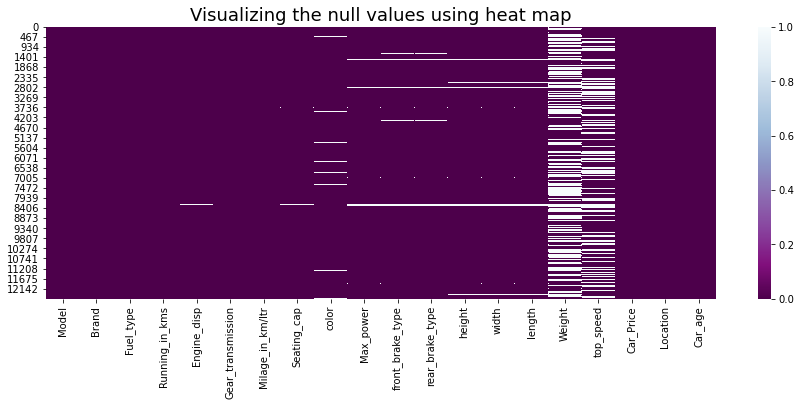

In [56]:
# Let's visualize the null values clearly using heat map
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cmap="BuPu_r")
plt.title("Visualizing the null values using heat map",fontsize=18)
plt.show()

From the heat map we can clearly notice the presence of missing values by looking at the white lines present in the map.

### Treating null values using imputation techniques

In [57]:
df.skew()

Running_in_kms      7.906142
Engine_disp         1.895318
Milage_in_km/ltr   -0.511076
Seating_cap         2.444332
Max_power           2.939518
height              0.955643
width               0.800815
length              0.434823
Weight              1.032898
top_speed           0.896381
Car_Price           9.610453
Car_age             0.723524
dtype: float64

The following columns:
* Engine_disp
* Milage_in_km/ltr
* Max_power
* height
* width
* length
* top_speed 
have continuous data and contains more skewness and outliers so we can fill the null values with **median** in these columns except the column "length" which has no outliers. So, we can fill the missing values with **mean**.

The remaining columns:
* Seating_cap
* color
* front_brake_type
* rear_brake_type
    are having **categorical data** so we can replace the null values with most frequently occured values that is **mode** value.

In [58]:
# Checking the mean of the column "length"
print("The mean value of 'length' is:",df['length'].mean())

# Checking the median values of the columns "Engine_disp", "Milage_in_km/ltr", "Max_power", "height", "width", "Weight" and "top_speed"
print("\nThe median value of 'Engine_disp' is:",df["Engine_disp"].median())
print("The median value of 'Milage_in_km/ltr' is:",df["Milage_in_km/ltr"].median())
print("The median value of 'Max_power' is:",df["Max_power"].median())
print("The median value of 'height' is:",df["height"].median())
print("The median value of 'width' is:",df["width"].median())
print("The median value of 'Weight' is:",df["Weight"].median())
print("The median value of 'top_speed' is:",df["top_speed"].median())

# Checking the mode values of the categorical columns
print("\nThe mode value of 'Seating_cap' is:",df["Seating_cap"].mode())
print("The mode value of 'color' is:",df["color"].mode())
print("The mode value of 'front_brake_type' is:",df["front_brake_type"].mode())
print("The mode value of 'rear_brake_type' is:",df["rear_brake_type"].mode())

The mean value of 'length' is: 4083.963088878096

The median value of 'Engine_disp' is: 1248.0
The median value of 'Milage_in_km/ltr' is: 19.6
The median value of 'Max_power' is: 86.8
The median value of 'height' is: 1520.0
The median value of 'width' is: 1700.0
The median value of 'Weight' is: 1520.0
The median value of 'top_speed' is: 169.0

The mode value of 'Seating_cap' is: 0    5.0
dtype: float64
The mode value of 'color' is: 0    White
dtype: object
The mode value of 'front_brake_type' is: 0    Disc
dtype: object
The mode value of 'rear_brake_type' is: 0    Drum
dtype: object


These are the mean, median and mode values. These values will be filled in the place of missing values while we impute them.

In [59]:
# Filling null values in the column "length" by mean value as it does not contains any outliers and skewness
df["length"] = df["length"].fillna(df["length"].mean())

# Filling null values in the remaining numerical columns using median values as these columns contains outliers 
for i in ['Engine_disp','Milage_in_km/ltr','height','Max_power','width','length','Weight','top_speed']:
    df[i] = df[i].fillna(df[i].median())
    
# Filling null values in the categorical columns using mode values
for j in ['Seating_cap','front_brake_type','rear_brake_type','color']:
    df[j] = df[j].fillna(df[j].mode()[0])

In [60]:
# Checking missing values after using imputation techniques
df.isnull().sum()

Model                0
Brand                0
Fuel_type            0
Running_in_kms       0
Engine_disp          0
Gear_transmission    0
Milage_in_km/ltr     0
Seating_cap          0
color                0
Max_power            0
front_brake_type     0
rear_brake_type      0
height               0
width                0
length               0
Weight               0
top_speed            0
Car_Price            0
Location             0
Car_age              0
dtype: int64

We have successfully imputed the null values using mean, median and mode methods.

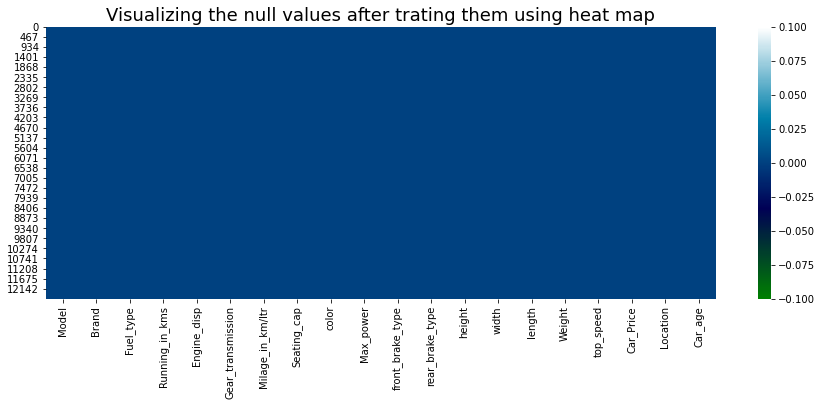

In [61]:
# Let's visualize the null values clearly using heat map
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cmap="ocean")
plt.title("Visualizing the null values after trating them using heat map",fontsize=18)
plt.show()

It is clear from the heat map that there are no null values in any of the column.

In [62]:
# Checking whether the target column contains any space in it
df.loc[df['Car_Price']==" "]

,Model,Brand,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,Car_Price,Location,Car_age


It seems that there are no spaces in the target column.

In [63]:
# Checking the uniqueness of target column
df["Car_Price"].unique()

array([ 294000.,  480000.,  711000., ...,   52000.,   93603., 1415000.])

These are the unique values present in the target column.

Great!!! We have successfully cleaned our dataset. Let's take a look at the dataset after cleaning.

In [64]:
# Let's check the dataframe after cleaning 
df.head()

,Model,Brand,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,Car_Price,Location,Car_age
0,Wagon R,Maruti,Petrol,131125.0,998.0,Manual,21.79,5.0,Grey,67.05,Disc,Drum,1675.0,1620.0,3655.0,1340.0,169.0,294000.0,Ahmedabad,7.0
1,Grand i10,Hyundai,Petrol,73875.0,1197.0,Manual,18.90,5.0,White,82.00,Disc,Drum,1520.0,1660.0,3765.0,1520.0,165.0,480000.0,Ahmedabad,6.0
2,Vento,Volkswagen,Diesel,97922.0,1498.0,Manual,22.27,5.0,White,108.60,Ventilated Disc,Drum,1467.0,1699.0,4390.0,1750.0,180.0,711000.0,Ahmedabad,3.0
3,S-Presso,Maruti,Petrol,24230.0,998.0,Manual,21.70,5.0,Red,67.05,Ventilated Disc,Drum,1564.0,1520.0,3565.0,1170.0,169.0,422000.0,Ahmedabad,2.0
4,Wagon R,Maruti,Petrol,41174.0,998.0,Automatic,20.51,5.0,Grey,67.00,Ventilated Disc,Drum,1700.0,1495.0,3599.0,1350.0,152.0,430000.0,Ahmedabad,4.0


In [65]:
# Checking the dimensions of the dataset 
print("Shape of the dataset is:",df.shape)

Shape of the dataset is: (12608, 20)


After cleaning the data we have left with 20 columns and 12608 rows.

### Description of Dataset

In [66]:
# Statistical summary of dataset
df.describe()

,Running_in_kms,Engine_disp,Milage_in_km/ltr,Seating_cap,Max_power,height,width,length,Weight,top_speed,Car_Price,Car_age
count,1.260800e+04,12608.000000,12608.000000,12608.000000,12608.000000,12608.000000,12608.000000,12608.000000,12608.000000,12608.000000,1.260800e+04,12608.000000
mean,5.772259e+04,1436.207249,19.556908,5.218036,100.130872,1563.792989,1718.849540,4083.963089,1603.173065,171.672430,7.709751e+05,6.121352
std,4.027723e+04,494.852497,4.220344,0.693750,44.445694,111.054497,125.361262,398.610518,319.636585,21.392996,1.080141e+06,3.143337
min,2.000000e+02,0.000000,0.000000,2.000000,32.500000,148.000000,1410.000000,3099.000000,1000.000000,86.000000,3.000000e+04,0.000000
25%,3.300000e+04,1197.000000,17.010000,5.000000,74.000000,1488.000000,1675.250000,3765.000000,1510.000000,163.000000,3.510000e+05,4.000000
50%,5.500000e+04,1248.000000,19.600000,5.000000,86.800000,1520.000000,1700.000000,3995.000000,1520.000000,169.000000,5.150000e+05,6.000000
75%,7.586225e+04,1498.000000,22.070000,5.000000,113.400000,1630.000000,1765.000000,4413.000000,1580.000000,175.000000,7.490000e+05,8.000000
max,1.080000e+06,5998.000000,36.000000,10.000000,641.000000,1995.000000,2220.000000,5295.000000,3350.000000,327.000000,3.080000e+07,35.000000


The describe() method gives the statistical information of the dataset. The summary of this dataset looks perfect since there are no negative/ invalid values present. It gives the summary of numerical data.

From the above description we can observe the following things

* The counts of every column is same which means there are no missing values present in the dataset as we are already treated them.
* The min value for "Engine_disp", "Milage_in_km/ltr" and "Car_age" is 0, which is not realistic. And looking at the maximum values for columns "Running_in_kms", "Engine_disp", "Max_power", "width", "length", "Weight", "top_speed" and "Car_Price" we can say that there are huge outliers present in our data.
* The mean value is greater than the median(50%) in the columns such as "Engine_disp", "Max_power", "length", "Weight", "top_speed" and "Car_Price" have high differences which means these columns are skewed to right.
* In the column "Milage_in_km/ltr", the median value is bit greater than mean which means the data is skewed to left.
* We need to remove these outliers and skewness except target column using appropriate methodsbefore building our machine learning models.

### Separating numerical and categorical columns

In [67]:
# Separating numerical and categorical columns

# Checking for categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
print("Categorical columns present in the dataset are:\n",categorical_col)

# Checking for numerical columns
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        numerical_col.append(i)
print("\nnumerical columns present in the dataset are:\n",numerical_col)

Categorical columns present in the dataset are:
 ['Model', 'Brand', 'Fuel_type', 'Gear_transmission', 'color', 'front_brake_type', 'rear_brake_type', 'Location']

numerical columns present in the dataset are:
 ['Running_in_kms', 'Engine_disp', 'Milage_in_km/ltr', 'Seating_cap', 'Max_power', 'height', 'width', 'length', 'Weight', 'top_speed', 'Car_Price', 'Car_age']


## Data Visualization

### Univariate Analysis

### Plotting categorical variables

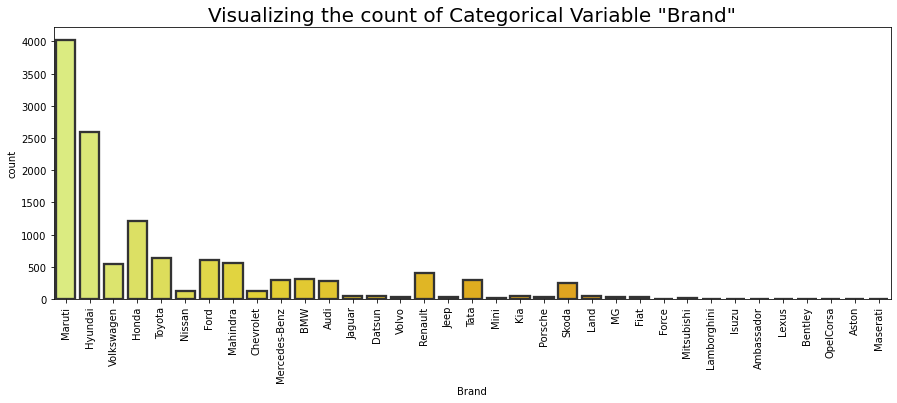

In [68]:
# Plotting categorical variables
plt.figure(figsize=(15,5))

plt.title('Visualizing the count of Categorical Variable "Brand"',fontsize=20)
sns.countplot(df['Brand'],palette = 'Wistia',linewidth=2.3,edgecolor=".2")
plt.xticks(rotation=90)
plt.show()

### Observations:

* The above count plot gives the count of cars brand. From the graph we can conclude that the dataset contains most of the cars from Maruti and Hyundai Brand as the count is high for these brands.

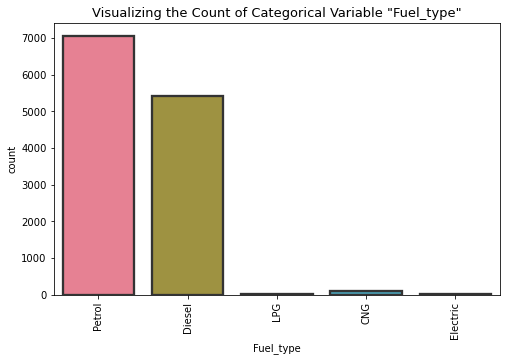

In [69]:
# Plotting count plot for categorical variable "Fuel_type" of the used cars
plt.figure(figsize=(8,5))

plt.title('Visualizing the Count of Categorical Variable "Fuel_type"',fontsize=13)
sns.countplot(df['Fuel_type'],palette ="husl", linewidth=2.3, edgecolor=".2")
plt.xticks(rotation=90)
plt.show()

### Observations

* The above plot gives the count of fuel types used byt he cars. More number of cars are using petrol followed by diesel as fuel. And very few cars uses CNG, LPG and Electricity as fuel type.

Manual       9608
Automatic    3000
Name: Gear_transmission, dtype: int64


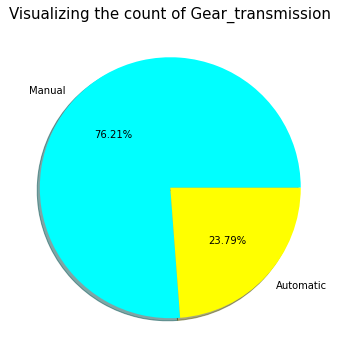

In [70]:
# Visualizing the count of Gear_transmission of the car
print(df['Gear_transmission'].value_counts())
labels = 'Manual','Automatic'
colors = ['cyan','yellow']
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(df['Gear_transmission'].value_counts(),labels=labels,autopct='%1.2f%%',shadow=True,colors=colors)
plt.title("Visualizing the count of Gear_transmission", fontsize=15)
plt.show()

### Observations

* The above plot gives the count of Gear_transmission. From the plot we can notice that around 76% of the cars are with Manual gears system and only 23% of the cars with Automatic gear tranmission system.

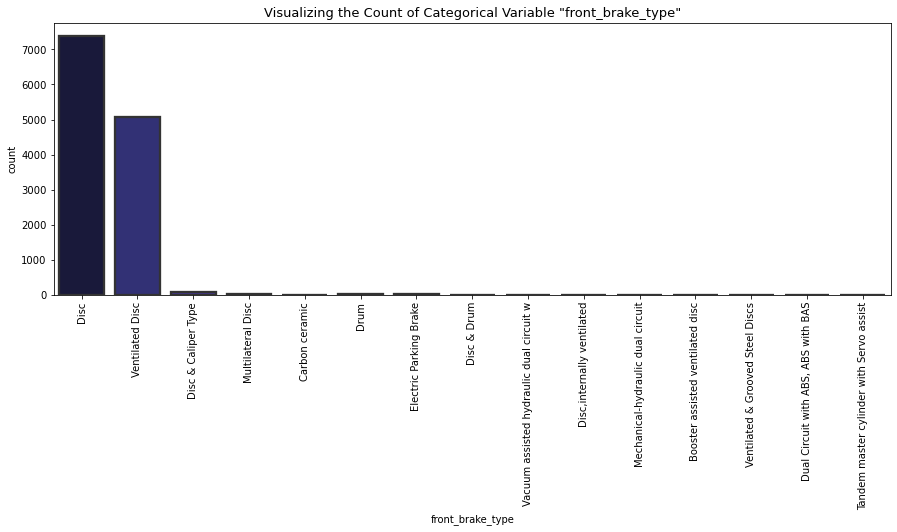

In [71]:
# Visualizinf the counts of front_brake_type of the used cars
plt.figure(figsize=(15,5))

plt.title('Visualizing the Count of Categorical Variable "front_brake_type"',fontsize=13)
sns.countplot(df['front_brake_type'],palette ="CMRmap", linewidth=2.3, edgecolor=".2")
plt.xticks(rotation=90)
plt.show()

### Observations:
* By visualizing the above count plot we can conclude that the cars with Disc and Ventilated Disc type of brake system used for front-side wheels are having high count compared to other brake types.

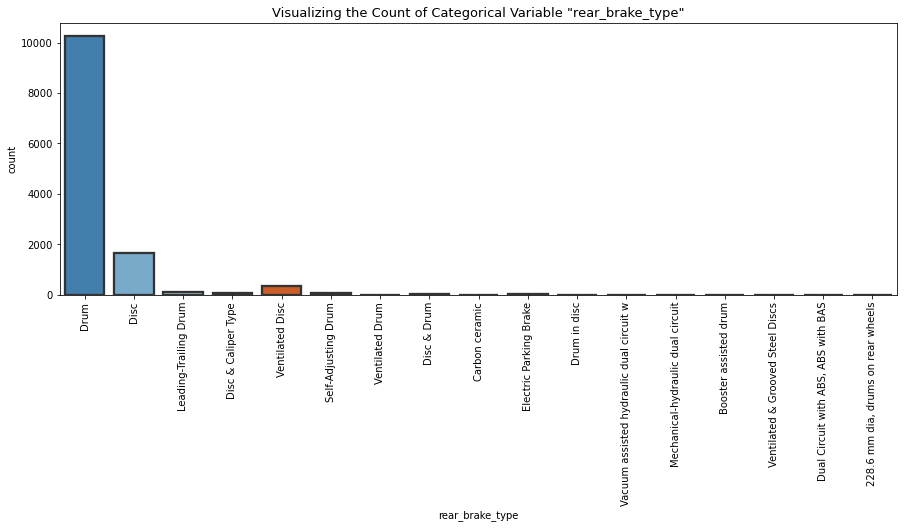

In [72]:
# Visualizinf the counts of rear_brake_type of the used cars
plt.figure(figsize=(15,5))

plt.title('Visualizing the Count of Categorical Variable "rear_brake_type"',fontsize=13)
sns.countplot(df['rear_brake_type'],palette ="tab20c", linewidth=2.3, edgecolor=".2")
plt.xticks(rotation=90)
plt.show()

### Observations:
* The above graph represents the count of rear_brake_type of the cars which shows that the cars having Drum type of brake system used for back-side wheels are having high count of around 10000 compared to other type of rear brakes.

Delhi_NCR    1490
Bangalore    1486
Mumbai       1478
New_Delhi    1473
Pune         1239
Gurgaon      1040
Noida         982
Hyderabad     918
Chennai       836
Kolkata       595
Ahmedabad     579
Jaipur        492
Name: Location, dtype: int64


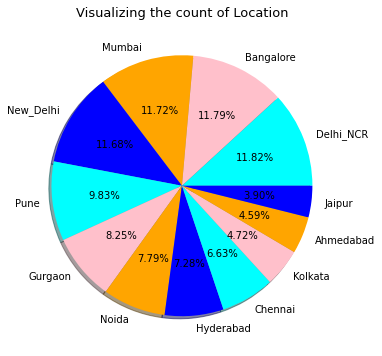

In [73]:
# Visualizing the count of Location of the car 
print(df["Location"].value_counts())
labels='Delhi_NCR','Bangalore','Mumbai','New_Delhi','Pune','Gurgaon','Noida','Hyderabad','Chennai','Kolkata','Ahmedabad','Jaipur'
colors = ["cyan", "pink","orange","blue"]
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(df['Location'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,colors=colors)
plt.title("Visualizing the count of Location",fontsize=13)
plt.show()

### Observations:
* By looking at the above count plot we can get to know that the cars from the city Delhi_NCR, Bangalore, Mumbai and New_Delhi have high counts which are almost similar. And the other locations also have no much difference in the counts.

## Distribution of skewness

### Plotting Numerical Variables

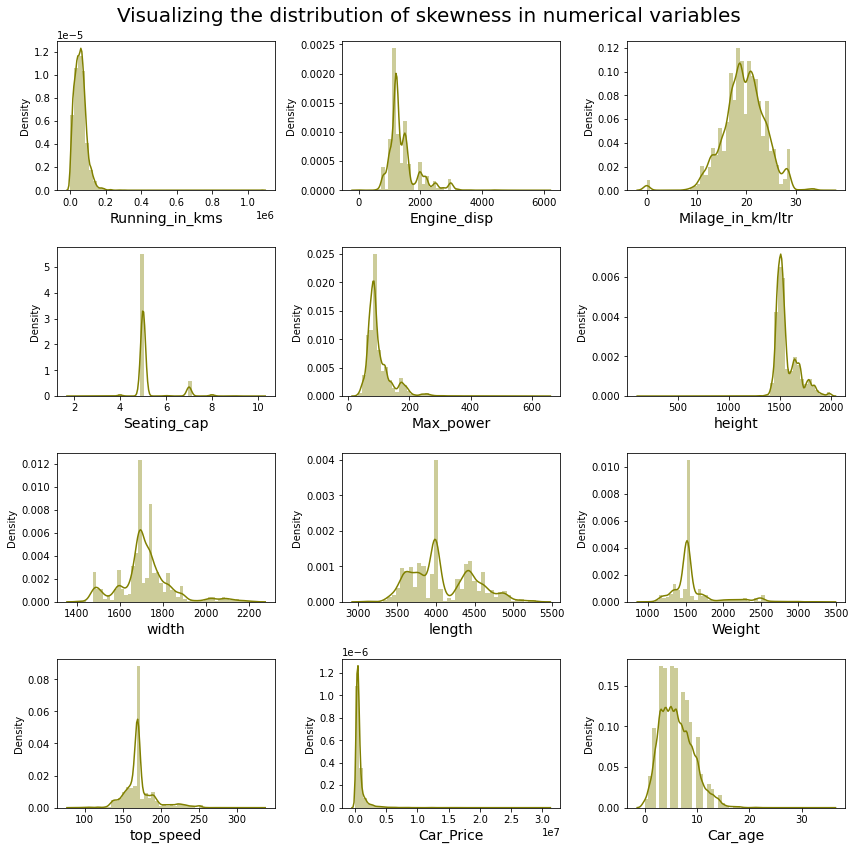

In [74]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(12,12),facecolor='white')
plt.suptitle("Visualizing the distribution of skewness in numerical variables",fontsize=20)
plotnumber=1
for column in numerical_col:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],color="olive")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

### Observations:
Above plot shows how the data has been distributed in each of the columns.

* From the distribution plots we can observe most of the columns are not normally distributed, only the columns "Milage_in_km/ltr" looks somewhat normal.
* Also, we can notice the columns like "Running_in_kms", "Engine_disp", "Max_power", "Weight", "Car_age" etc are skewed to right as the mean value in these columns are much greater than the median(50%).
* The data in the column "height" skewed to left since the mean values is less than the median.
* We need to remove this skewness before building our machine learning models.

### Bivariate Analysis

### Visualizing Categorical variables vs Car_price

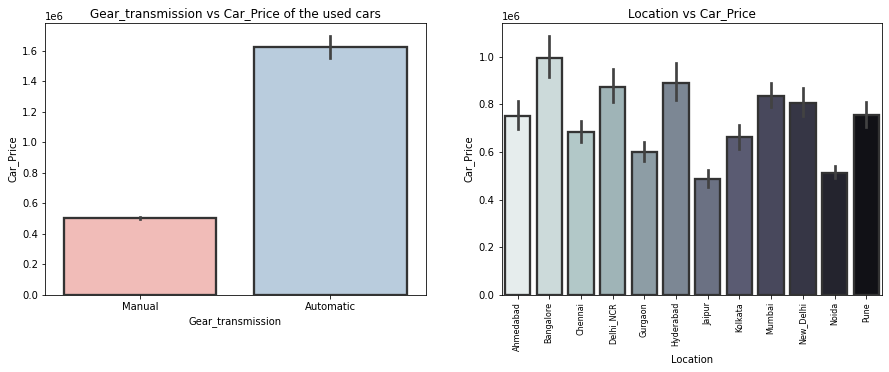

In [75]:
plt.figure(figsize=(15,5))

# Comparing Car_Price and Gear_transmission of the used cars
plt.subplot(1,2,1)
sns.barplot(df['Gear_transmission'],df['Car_Price'],palette="Pastel1", linewidth=2.3, edgecolor=".2");
plt.title('Gear_transmission vs Car_Price of the used cars')

# Comparing Car_Price and Location of the used cars
plt.subplot(1,2,2)
sns.barplot(df['Location'],df['Car_Price'],palette="bone_r", linewidth=2.3, edgecolor=".2");
plt.title('Location vs Car_Price')
plt.xticks(fontsize='8')
plt.xticks(rotation=90)
plt.show()

### Observations:
* Car_Price vs Gear_transmission: From the bar plot we can observe that the cars which have Automatic gear transmission system are having high price compared to the cars which have Manual gear transmission system.
* Car_Price vs Location: From the second plot we came to know that the old cars from the city Bangalore have higher price followed by Hyderabad and Delhi_NCR. And the cars from the cities Jaipur, Noida, Gurgaon etc have very less price.

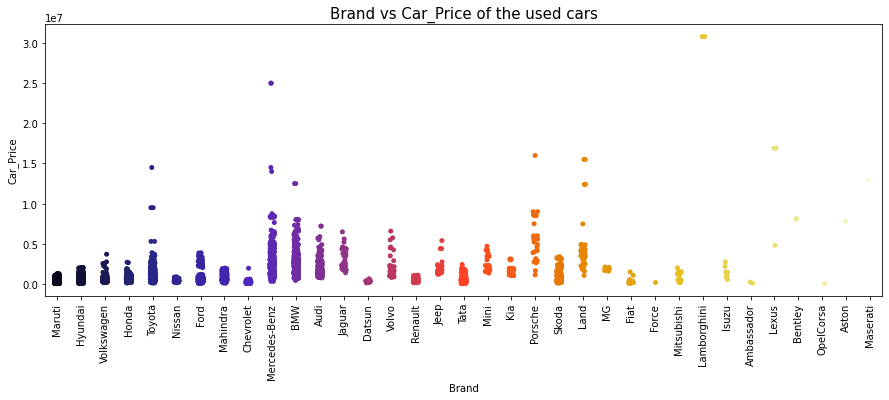

In [76]:
# Comparing Car_Price and Brand of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['Brand'],df['Car_Price'],palette="CMRmap");
plt.title('Brand vs Car_Price of the used cars',fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Observations:
* Car_Price vs Brand: The above strip plot shows how the used car prices changes depending on Brands. Here the cars from Mercedes_Benz and BMW brand have high price compared to other brands.

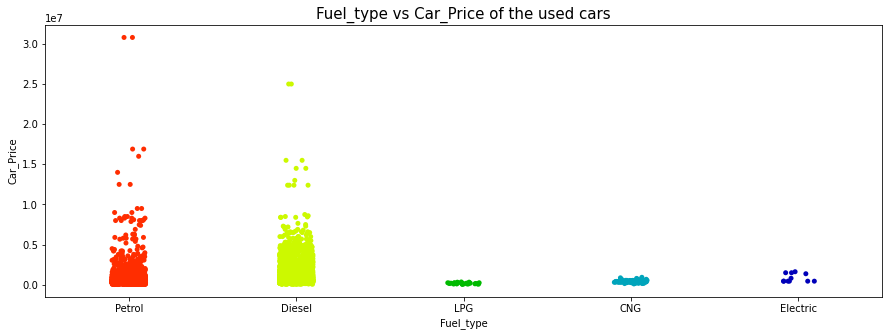

In [77]:
# Comparing Car_Price and Fuel_type of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['Fuel_type'],df['Car_Price'],palette="nipy_spectral_r");
plt.title('Fuel_type vs Car_Price of the used cars',fontsize=15)
plt.show()

### Observations:
* Car_Price vs Fuel_type: From the graph we can conclude that more number of cars are using Petrol and Diesel fuels and these cars have wide range of price from minimum to maximum. And very few of the cars uses CNG, LPG, and Electricity as fuel type which are not much expensive when compared to that of the diesel and petrol cars.

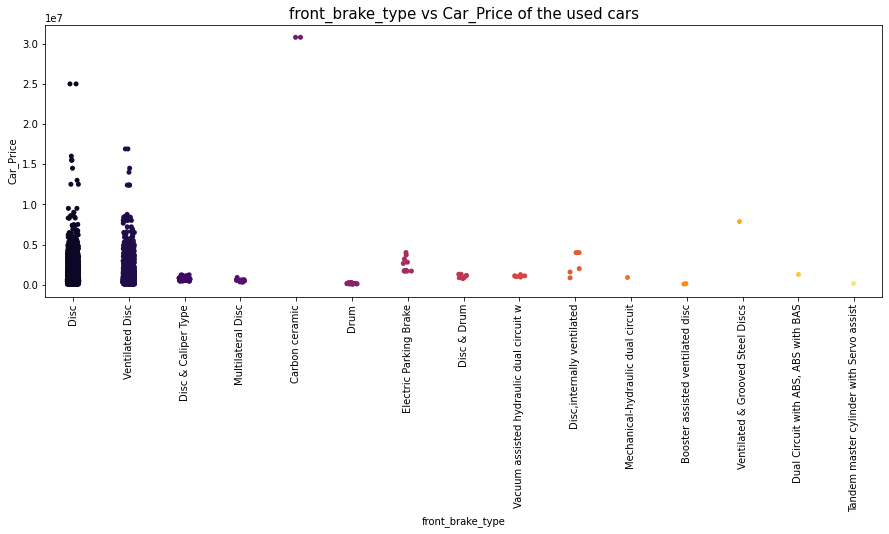

In [78]:
# Comparing Car_Price and front_brake_type of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['front_brake_type'],df['Car_Price'],palette="inferno");
plt.title('front_brake_type vs Car_Price of the used cars',fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Observations:
* Car_Price vs front_brake_type: Looking at the above bar plot for front_brake_type vs Car_Price we can say that the cars with Disc and Ventilated Disc system for front wheels are having higher prices than other type of braking systems.

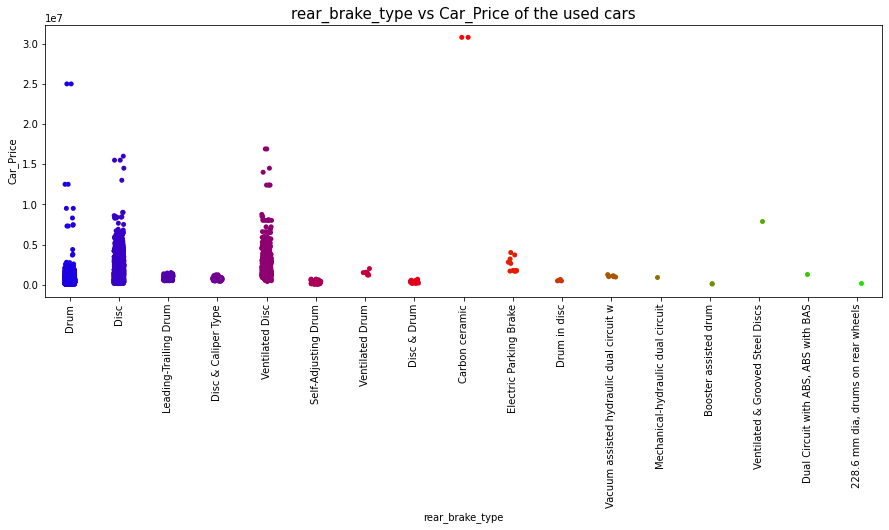

In [79]:
# Comparing Car_Price and rear_brake_type of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['rear_brake_type'],df['Car_Price'],palette="brg");
plt.title('rear_brake_type vs Car_Price of the used cars',fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Observations:
* Car_Price vs rear_brake_type: The above graph is representing a barplot for rear_brake_type vs Car_Price which tells us that the cars having Ventilated Disc or Disc or Drum brake system are having higher prices than the cars with other type of braking system at rear side.

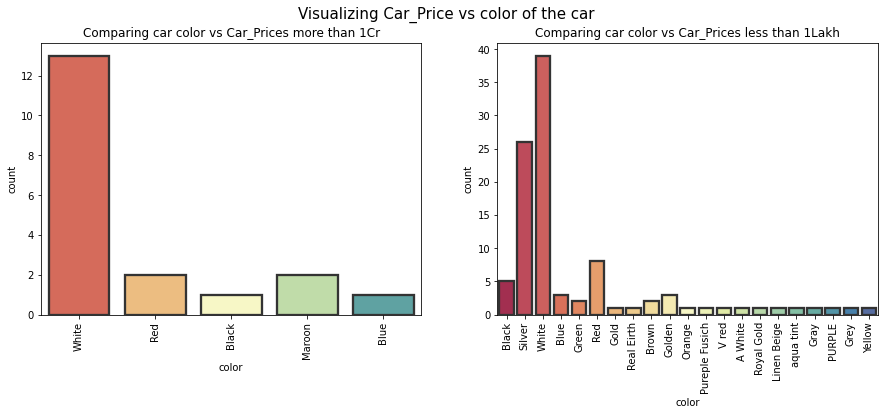

In [80]:
plt.figure(figsize = (15,5))
plt.suptitle("Visualizing Car_Price vs color of the car",fontsize=15)
plt.subplot(1,2,1)
plt.title("Comparing car color vs Car_Prices more than 1Cr")
sns.countplot(x = 'color', data = df.loc[df['Car_Price']>= 10000000], palette='Spectral',linewidth=2.3, edgecolor=".2")
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
plt.title("Comparing car color vs Car_Prices less than 1Lakh")
sns.countplot(x = 'color', data = df.loc[df['Car_Price']<= 100000], palette='Spectral',linewidth=2.3, edgecolor=".2")
plt.xticks(rotation = 90)
plt.show()

### Observations:
* Car_Price vs color: The first count plot is for the car color vs Car_Prices more than 1 Cr. The plot shows the colors of expensive cars. The white color cars are more expensive compared to the cars with other colors.
* The second graph is for the car color vs car prices below 1 Lakh and it shows the colors of cars which are cheap. From the plot we can say the cars with Silver color and white color have less price.

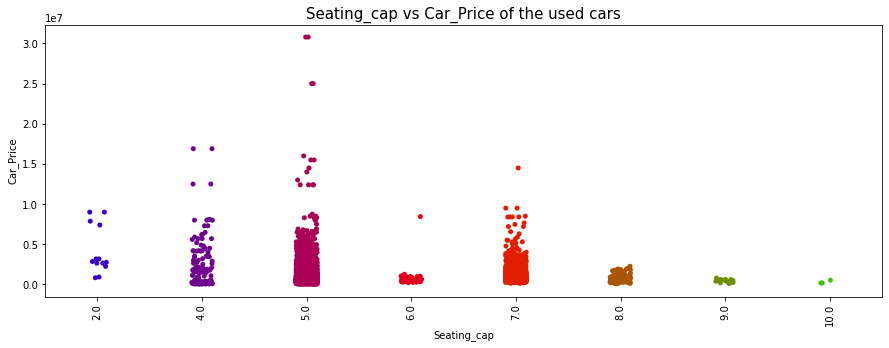

In [81]:
# Comparing Car_Price and Seating_cap of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['Seating_cap'],df['Car_Price'],palette="brg");
plt.title('Seating_cap vs Car_Price of the used cars',fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Observations:
* Car_Price vs Seating_cap: Most of the cars have seating capacity of 5, 7 and 4 and these cars having higher prices than other cars. And only 3 cars are observed with the seating capacity of 10.

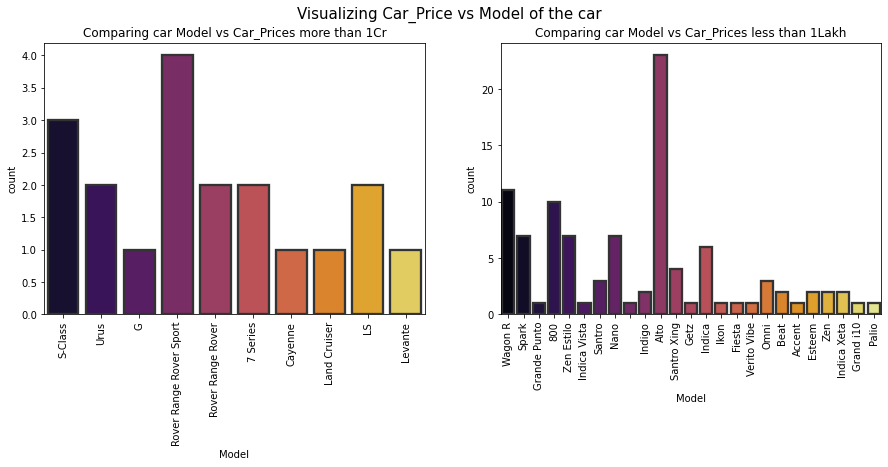

In [82]:
plt.figure(figsize = (15,5))
plt.suptitle("Visualizing Car_Price vs Model of the car",fontsize=15)
plt.subplot(1,2,1)
plt.title("Comparing car Model vs Car_Prices more than 1Cr")
sns.countplot(x = 'Model', data = df.loc[df['Car_Price']>= 10000000], palette='inferno',linewidth=2.3, edgecolor=".2")
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
plt.title("Comparing car Model vs Car_Prices less than 1Lakh")
sns.countplot(x = 'Model', data = df.loc[df['Car_Price']<= 100000], palette='inferno',linewidth=2.3, edgecolor=".2")
plt.xticks(rotation = 90)
plt.show()

### Observations:
* Car_Price vs Model: The first plot is for car model vs car price more than 1Cr. This plot showing the models of expensive cars. The Rover Range Sport model are expensive compared to other models.
* The second plot is for car model vs car price less than 1 Lakh. This plot showing the models which are very cheap. So, from the graph we can say that the car model Alto have very less price.

### Visualizing Numerical variables vs Car_Price

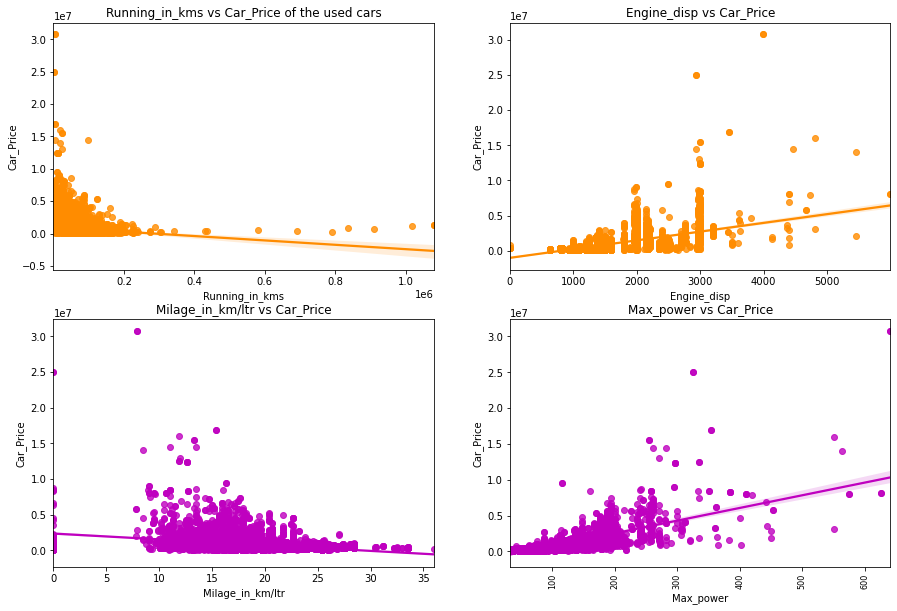

In [83]:
plt.figure(figsize=(15,10))

# Comparing Car_Price and 'Running_in_kms' of the used cars
plt.subplot(2,2,1)
sns.regplot(x= df['Running_in_kms'],y= df['Car_Price'],color='darkorange')
plt.title('Running_in_kms vs Car_Price of the used cars',fontsize=12)

# Comparing Car_Price and 'Engine_disp' of the used cars
plt.subplot(2,2,2)
sns.regplot(x= df['Engine_disp'],y= df['Car_Price'],color='darkorange')
plt.title('Engine_disp vs Car_Price',fontsize=12)

# Comparing Car_Price and 'Milage_in_km/ltr' of used cars
plt.subplot(2,2,3)
sns.regplot(x= df['Milage_in_km/ltr'],y= df['Car_Price'],color='m')
plt.title('Milage_in_km/ltr vs Car_Price',fontsize=12)

# Comparing Car_Price vs 'Max_power' of the cars
plt.subplot(2,2,4)
sns.regplot(x= df['Max_power'],y= df['Car_Price'],color='m')
plt.title('Max_power vs Car_Price',fontsize=12)
plt.xticks(fontsize='8')
plt.xticks(rotation=90)
plt.show()

### Observations:
* Car_Price vs Running_in_kms: From the plot we can say that the prices of cars are higher for the cars which have less running in kms. We can also notice there is negative linear relation between the price and running of cars.
* Car_Price vs Engine_disp: There is a positive correlation between car price and engine displacement. So, we can say as the engine disp or engine cc increases, the price of car also increases.
* Car_Price vs Milage_in_km/ltr: The cars having the milage in the range of 10 to 20 km/ltr are having high sale price. From the graph we can also notice there is negative linear/correlation between the price nad milage also some used cars have 0 milage which is unrealistic.
* Car_Price vs Max_power: Looking at the graph we can say there is positive correlation between car price and maximum engine power so, we can say as maximum power engine increases, the car prices also go on increasing.

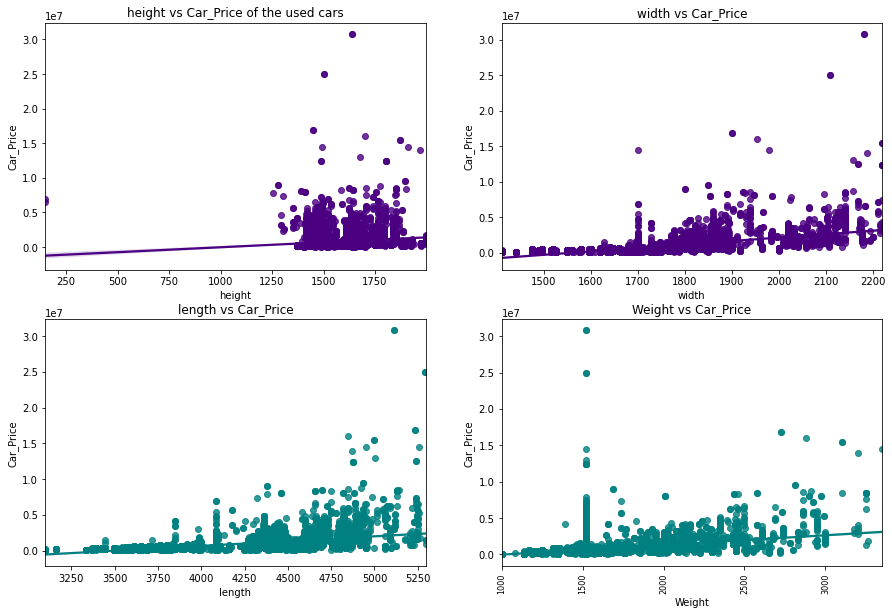

In [84]:
plt.figure(figsize=(15,10))

# Comparing Car_Price and 'height' of the used cars
plt.subplot(2,2,1)
sns.regplot(x= df['height'],y= df['Car_Price'],color='indigo')
plt.title('height vs Car_Price of the used cars',fontsize=12)

# Comparing Car_Price and 'width' of the used cars
plt.subplot(2,2,2)
sns.regplot(x= df['width'],y= df['Car_Price'],color='indigo')
plt.title('width vs Car_Price',fontsize=12)

# Comparing Car_Price and 'length' of used cars
plt.subplot(2,2,3)
sns.regplot(x= df['length'],y= df['Car_Price'],color='teal')
plt.title('length vs Car_Price',fontsize=12)

# Comparing Car_Price vs 'Weight' of the cars
plt.subplot(2,2,4)
sns.regplot(x= df['Weight'],y= df['Car_Price'],color='teal')
plt.title('Weight vs Car_Price',fontsize=12)
plt.xticks(fontsize='8')
plt.xticks(rotation=90)
plt.show()

### Observations:
* Car_Price vs height: From the graph it is clear that the car price is not strongly related with the height of the car, we can say the cars having height in the range of 1300 mm to 1800 mm have somewhat high price.
* Car_Price vs width: The graph shows there is some positive linear relation between car price and width of the car, so the cars having width in the range of 1700mm to 2200mm have high price. So we can conclude as the width of the car increases, the price of the car also goes on increasing.
* Car_Price vs length: There is some positive linear relation between car price and length of the cars. As the length of the cars increases, the price of the cars also increases. The cars that are having the length above 4250mm have high price.
* Car_Price vs Weight: There is some positive linear relation between price of the car and weight. The cars with weight 1500kg have high price.

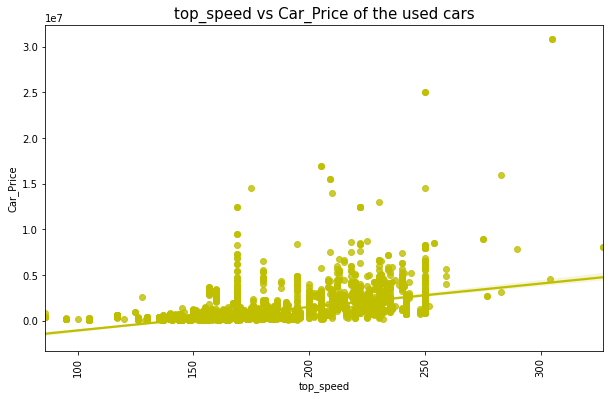

In [85]:
# Comparing Car_Price and 'top_speed' of the used cars
plt.figure(figsize=(10,6))
sns.regplot(x= df['top_speed'],y= df['Car_Price'],color='y')
plt.title('top_speed vs Car_Price of the used cars',fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Observations:
* Car_Price vs top_speed: From the graph we can notice there is positive linear relation between car price and maximum speed limit of the car. The cars having top speed in the range of 120 km/hr to 250 km/hr having higher price and there are very less number of cars which have top speed below 100km/hr. So, we can conclude that as the maximum speed limit of the car (top_speed) increases, the car price also increases.

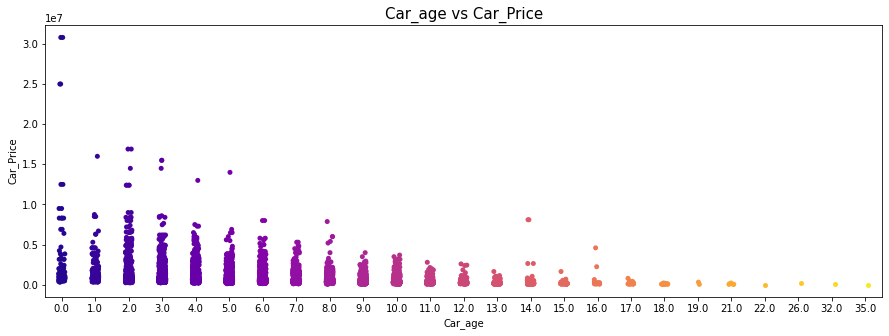

In [86]:
# Comparing Car_Price and 'Car_age' of the used cars
plt.figure(figsize=(15,5))
sns.stripplot(df['Car_age'],df['Car_Price'],palette="plasma")
plt.title('Car_age vs Car_Price',fontsize=15)
plt.show()

### Observations:
* Car_Price vs Car_age: From the above strip plot we can say that the older cars are having very lower prices when compared to the new cars that is the cars having very less age. So, there is negative relation between car price and age of the cars and we can conclude as the age decreases, the car prices increases.

Till now we have checked the relation between the independent variables and dependent variable that is our target column "Car_Price". Now let's check the relation between two independent variables and compare each of them with others.

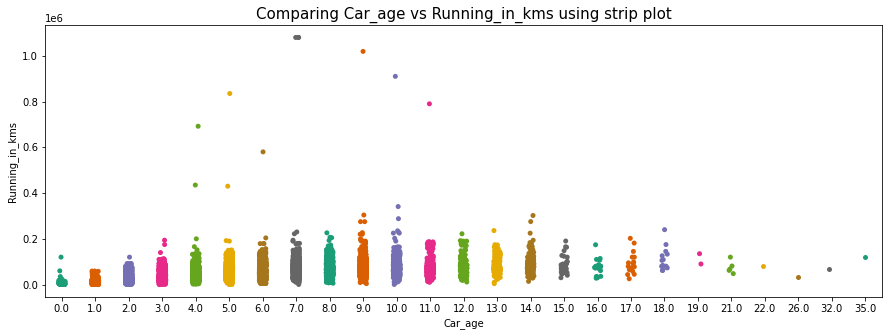

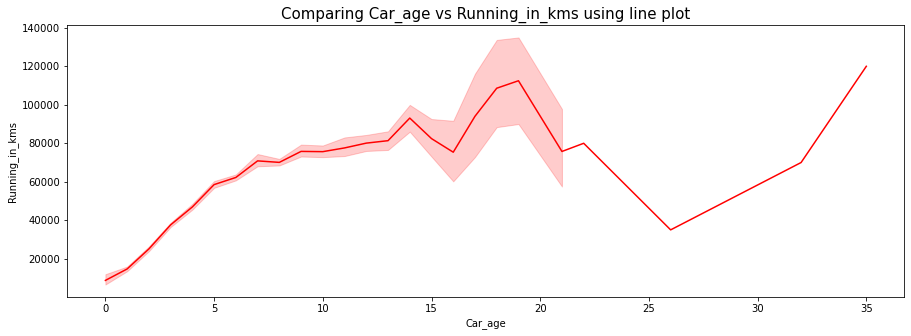

In [87]:
# Checking the relation between car age and running in kms
plt.figure(figsize = (15,5))
sns.stripplot(x = 'Car_age', y = 'Running_in_kms', data = df, palette = "Dark2")
plt.title("Comparing Car_age vs Running_in_kms using strip plot",fontsize=15)

plt.figure(figsize = (15,5))
sns.lineplot(x = 'Car_age', y = 'Running_in_kms', data = df, color = "r")
plt.title("Comparing Car_age vs Running_in_kms using line plot",fontsize=15)
plt.show()
plt.show()

### Observations:
* Car_age vs Running_in_kms: The above two graphs represents car_age vs Running in kms. The cars which have their age from 2 years to 16 years have highly used. That is the running kms for these cars are around 1 lakh kms.

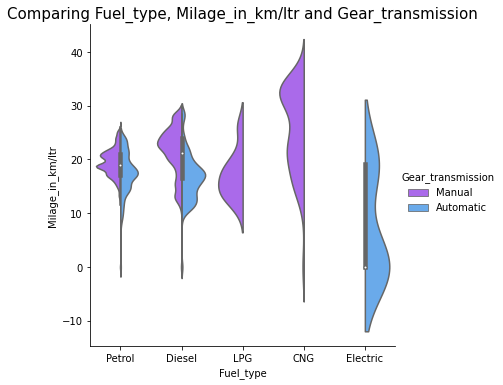

In [88]:
# Lets check the relation between fuel_type, Gear_transmission and Mileage of the cars
sns.catplot(x="Fuel_type", y="Milage_in_km/ltr", hue="Gear_transmission", kind="violin", split=True, palette="cool_r", data=df)
plt.title("Comparing Fuel_type, Milage_in_km/ltr and Gear_transmission",fontsize=15)
plt.show()

### Observations:
* The above violin plot gives the relation between Milage in km/ltr and Fuel type on the basis of gear transmission. As we can observe the cars with Manual gear transmission which are using CNG as a fuel are having good milage compared to other fuel types.

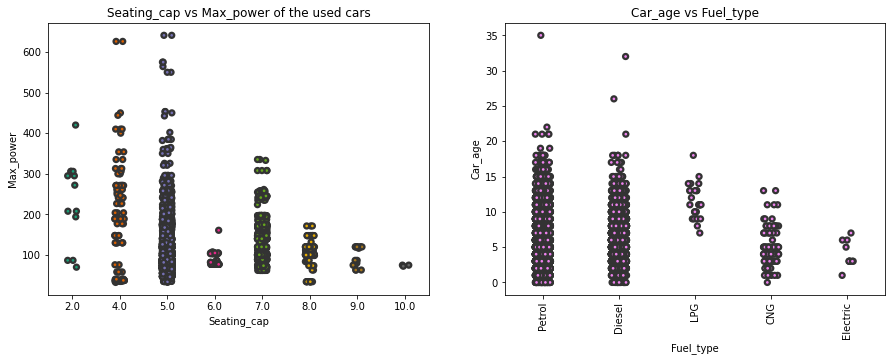

In [89]:
plt.figure(figsize=(15,5))

# Comparing Seating_cap and 'Max_power' of the used cars
plt.subplot(1,2,1)
sns.stripplot(x= df['Seating_cap'],y= df['Max_power'],palette = "Dark2",linewidth=2.3, edgecolor=".2")
plt.title('Seating_cap vs Max_power of the used cars',fontsize=12)

# Comparing Car_age and 'Fuel_type' of the used cars
plt.subplot(1,2,2)
sns.stripplot(x= df['Fuel_type'],y= df['Car_age'],linewidth=2.3, edgecolor=".2",color="violet")
plt.title('Car_age vs Fuel_type',fontsize=12)

plt.xticks(rotation=90)
plt.show()

### Observations:
* Seating_cap vs Max_power: The cars with seating capacity 5 have high maximum power of engine used in cars and the cars with 10 seating capacity have very less maximum engine power.
* Fuel_type vs Car_age: The cars which are using Petrol and Diesel as fuel they have high age and the cars with low age are using electricity as the fuel i.e they are introduced in recent years uses electricity as the fuel.

### Multivariate Analysis

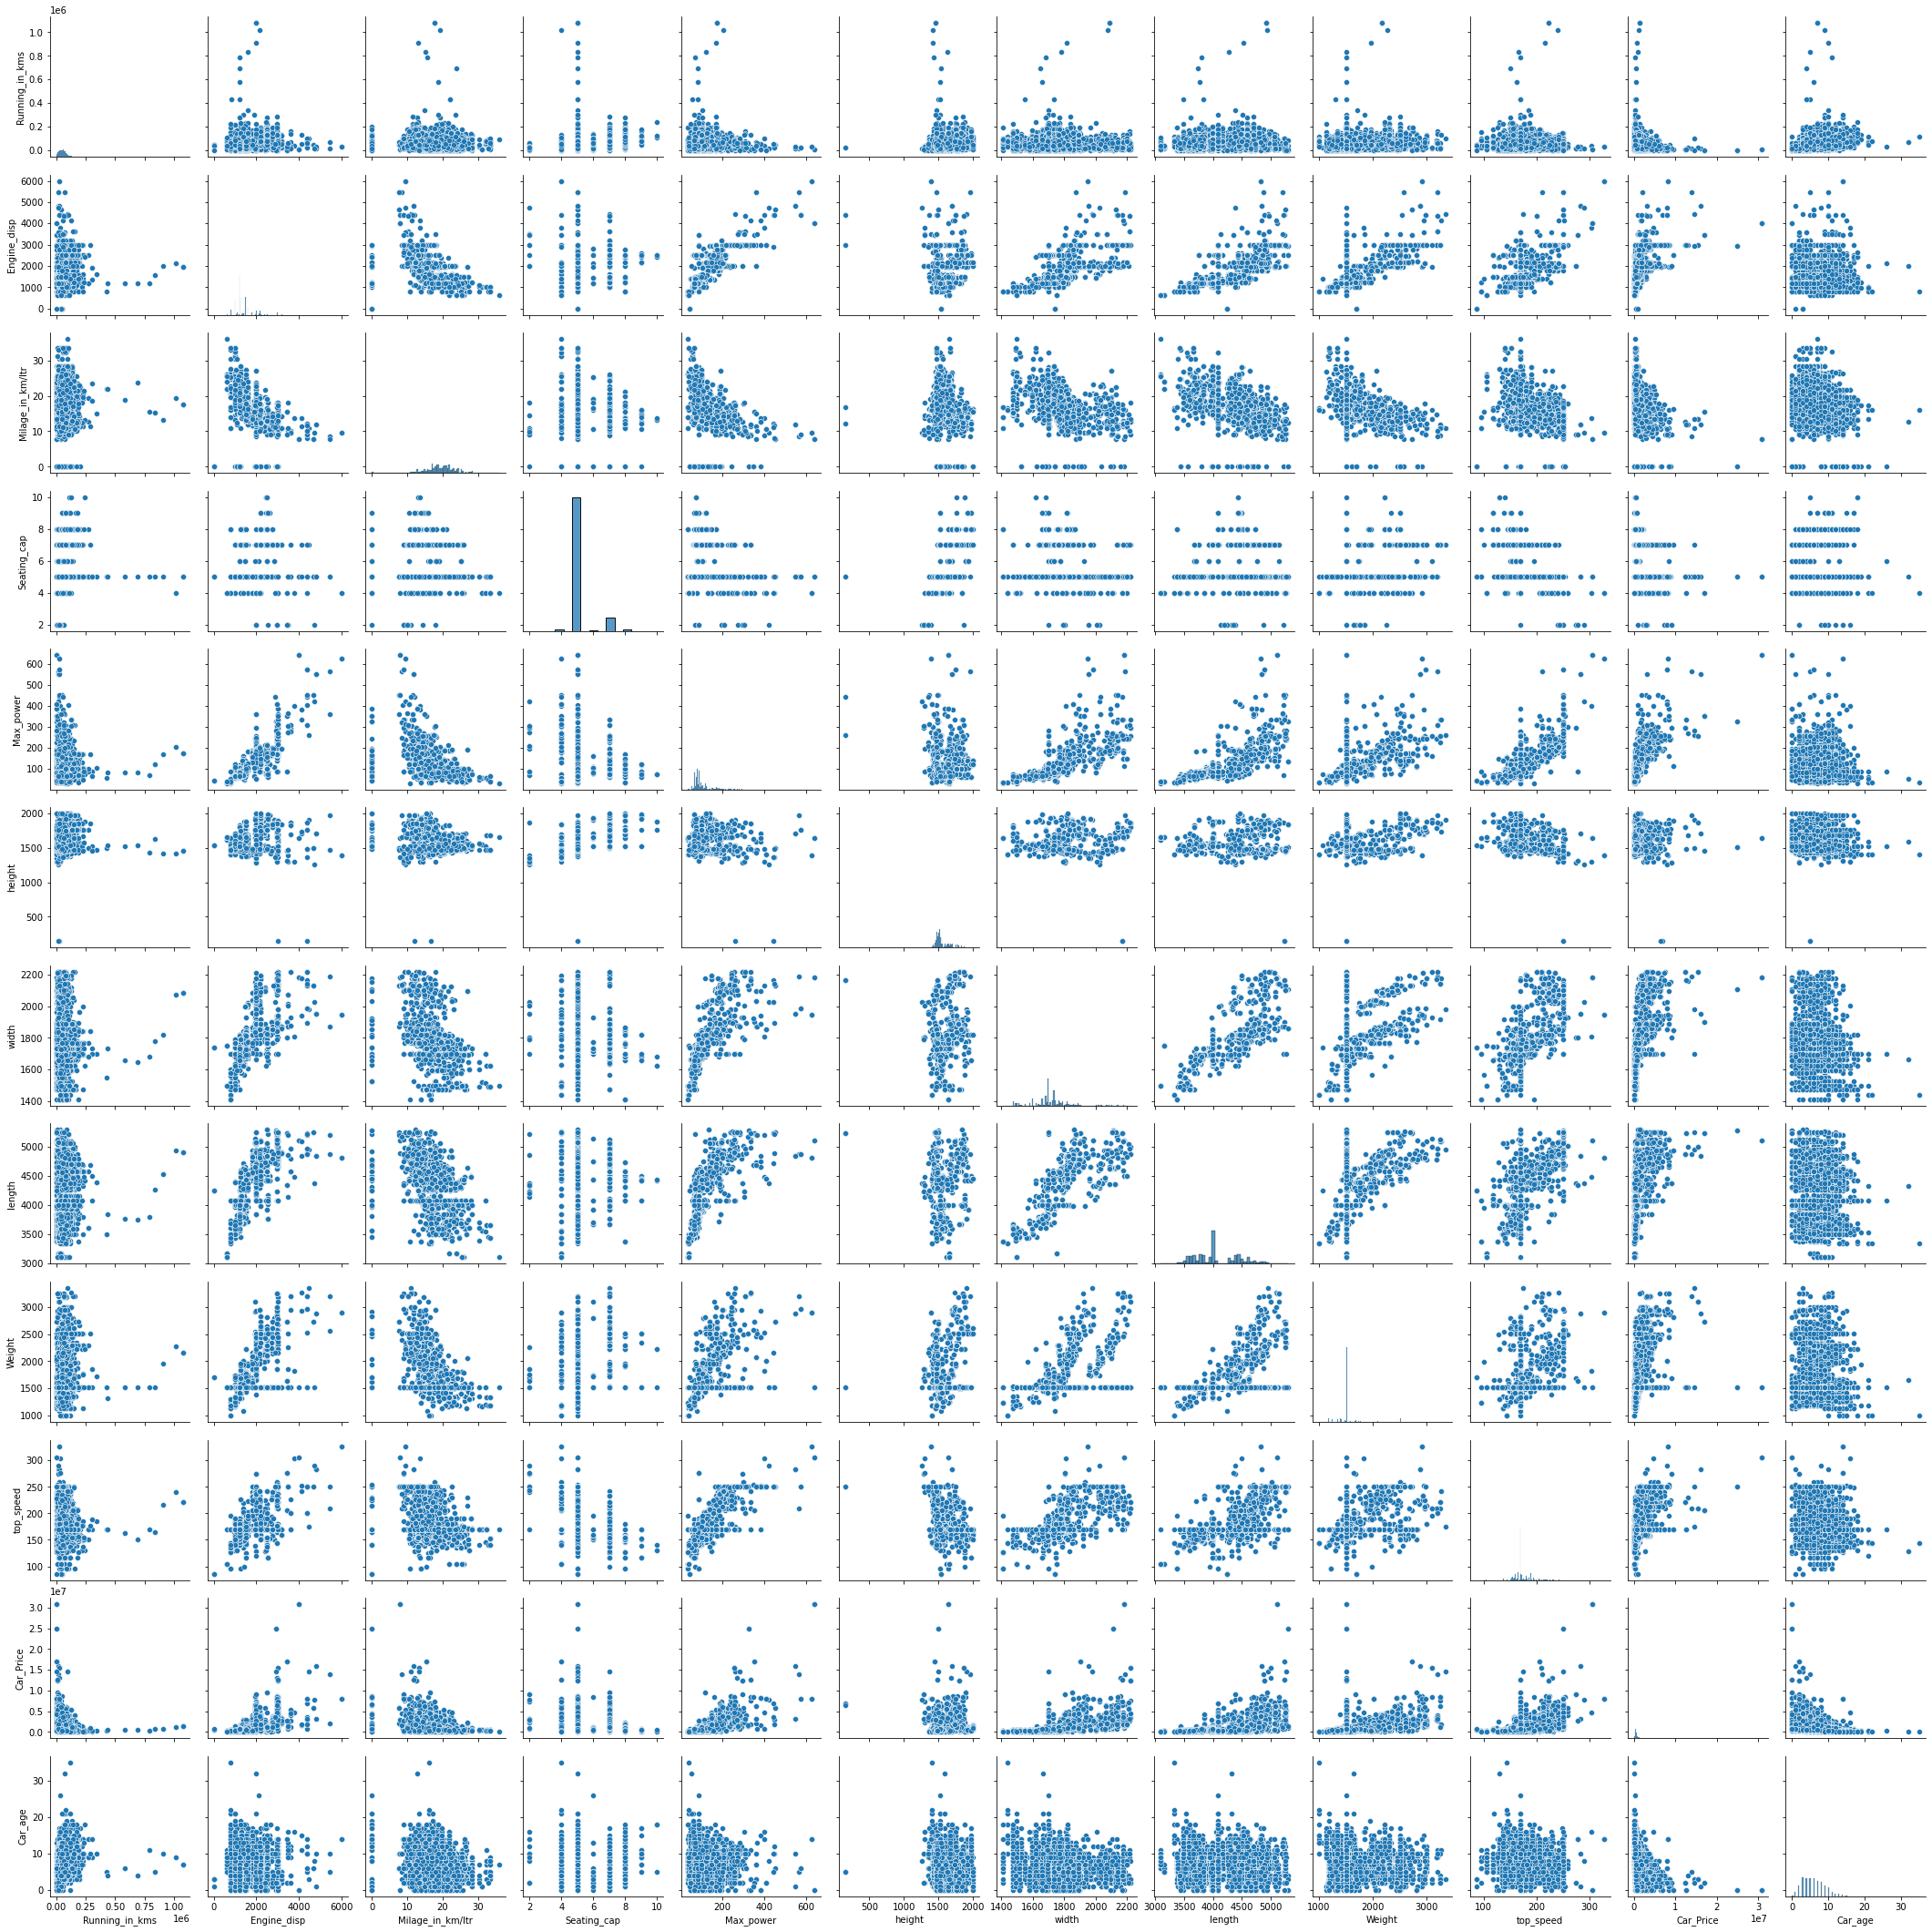

In [90]:
sns.pairplot(df,palette="husl")
plt.show()

* The pairplot gives the pairwise relation between the features on the basis of the target "Car_Price". On the diagonal we can notice the distribution plots.
* From the pair plot we can observe some of the features have strong correlation with each other and some of them have weak correlation with each other.
* We can also find some outliers present in the data, we will remove them using appropriate methods.

### Identifying the outliers in the dataset using boxplot

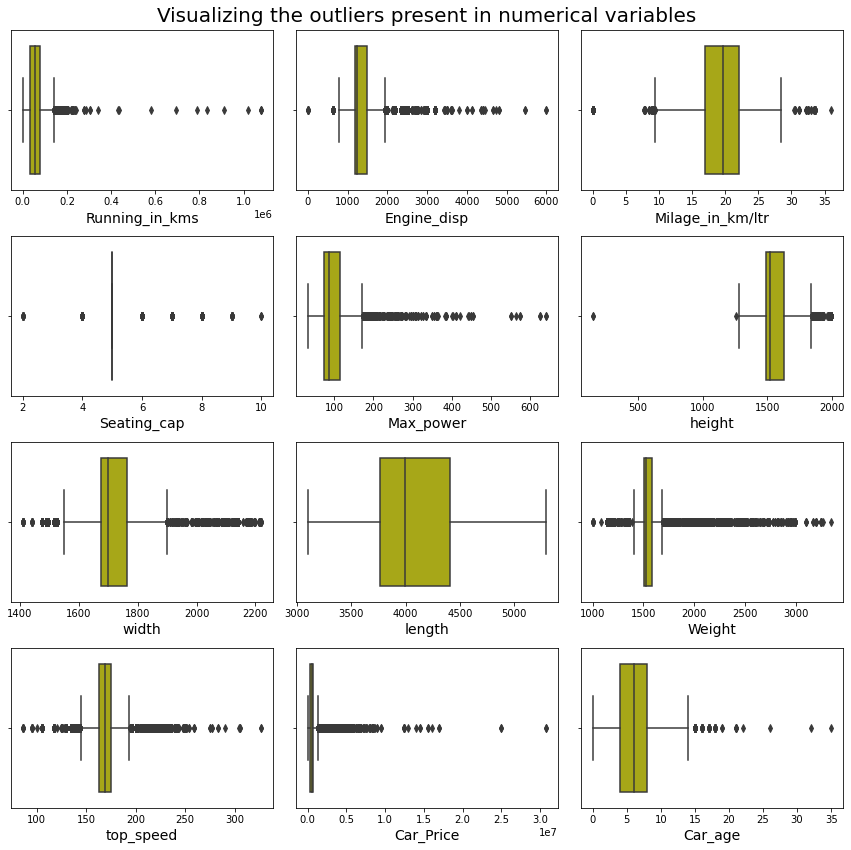

In [91]:
plt.figure(figsize=(12,12),facecolor='white')
plt.suptitle("Visualizing the outliers present in numerical variables",fontsize=20)
plotnumber=1
for column in numerical_col:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[column],color="y")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

From the above box plots we can observe all the columns contains the outliers except "length".
Also the column Car_Price is our target variable, so no need to remove outliers in these two columns. Let's remove the outliers in the remaining columns.

### Removing outliers 

#### 1. Zscore method

In [92]:
# Features containing outliers
features = df[['Running_in_kms','Engine_disp','Milage_in_km/ltr','Seating_cap','Max_power','height','width','Weight','top_speed','Car_age']]

# Using Zscore to remove outliers
from scipy.stats import zscore
z = np.abs(zscore(features))

In [93]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)]
new_df.head()

,Model,Brand,Fuel_type,Running_in_kms,Engine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,Car_Price,Location,Car_age
0,Wagon R,Maruti,Petrol,131125.0,998.0,Manual,21.79,5.0,Grey,67.05,Disc,Drum,1675.0,1620.0,3655.0,1340.0,169.0,294000.0,Ahmedabad,7.0
1,Grand i10,Hyundai,Petrol,73875.0,1197.0,Manual,18.90,5.0,White,82.00,Disc,Drum,1520.0,1660.0,3765.0,1520.0,165.0,480000.0,Ahmedabad,6.0
2,Vento,Volkswagen,Diesel,97922.0,1498.0,Manual,22.27,5.0,White,108.60,Ventilated Disc,Drum,1467.0,1699.0,4390.0,1750.0,180.0,711000.0,Ahmedabad,3.0
3,S-Presso,Maruti,Petrol,24230.0,998.0,Manual,21.70,5.0,Red,67.05,Ventilated Disc,Drum,1564.0,1520.0,3565.0,1170.0,169.0,422000.0,Ahmedabad,2.0
4,Wagon R,Maruti,Petrol,41174.0,998.0,Automatic,20.51,5.0,Grey,67.00,Ventilated Disc,Drum,1700.0,1495.0,3599.0,1350.0,152.0,430000.0,Ahmedabad,4.0


Thsi is the new datahrame after removing outliers.

In [94]:
# Checking the dimnesions of both the datasets
print(df.shape)
print(new_df.shape)

(12608, 20)
(11481, 20)


In [95]:
# Checking data loss
loss = (12608-11480)/12608*100
loss

8.946700507614214

By using Zscore I am losing around 8.9% of data which is acceptable as the acceptable range of data loss is less than 10. Let's try to remove outliers using IQR method and check the data loss.

#### 2. IQR (InterQuantileRange) method

In [96]:
# Removing outliers using IQR method
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [97]:
print(df1.shape)

(6464, 20)


In [98]:
# Checking the the data loss after removing outliers
loss = (12608-6464)/12608*100
loss

48.73096446700508

Using IQR method the data loss is 48.7%. So, considering Zscore method.

### Checking for skewness in the data

In [99]:
# Checking the skewness
new_df.skew()

Running_in_kms      0.553747
Engine_disp         1.323144
Milage_in_km/ltr    0.094848
Seating_cap         3.187292
Max_power           1.392424
height              1.275943
width               0.358475
length              0.415214
Weight              1.908091
top_speed           0.966678
Car_Price           3.537058
Car_age             0.489995
dtype: float64

We can find the skewness in all the columns except "Milage_in_km/ltr", "width", "length", and "Car_age". Let's remove skewness in the remaining columns.

### Removing skewness using yeo-johnson method

In [100]:
# Removing skewness using yeo-johnson  method to get better prediction
skew1 = ["Running_in_kms","Engine_disp","Seating_cap","Max_power","height","Weight","top_speed"]

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [101]:
new_df[skew1] = scaler.fit_transform(new_df[skew1].values)
new_df[skew1].head()

,Running_in_kms,Engine_disp,Seating_cap,Max_power,height,Weight,top_speed
0,2.130695,-1.195810,-0.19967,-1.002315,0.0,-1.079309,0.030349
1,0.676649,-0.323042,-0.19967,-0.221629,0.0,0.027186,-0.215359
2,1.327903,0.627849,-0.19967,0.729578,0.0,0.991807,0.653755
3,-1.041906,-1.195810,-0.19967,-1.002315,0.0,-2.600515,0.030349
4,-0.366963,-1.195810,-0.19967,-1.005376,0.0,-1.006562,-1.096125


In [102]:
# Checking skewness after using yeo-johnson method
new_df[skew1].skew()

Running_in_kms   -0.066951
Engine_disp      -0.019124
Seating_cap      -2.369892
Max_power        -0.017556
height            0.000000
Weight           -0.120538
top_speed        -0.049855
dtype: float64

We can observe the skewness has almost been removed in all the columns but in "Seating_cap". In this column the skewness has been reduced bit, it seems that the data in this column may be important so keeping it as it is. The column "height" has zero skewness which means it contains only unique entry that is zero throughout the dataset, So we can drop this column.

In [103]:
# Dropping irrelevant colum
new_df.drop("height",axis=1,inplace=True)

## Checking the correlation between the independent variables and the target column

In [104]:
cor = new_df.corr()
cor

,Running_in_kms,Engine_disp,Milage_in_km/ltr,Seating_cap,Max_power,width,length,Weight,top_speed,Car_Price,Car_age
Running_in_kms,1.000000,0.235234,0.009768,0.084825,0.088250,0.098911,0.168742,0.202939,0.087301,-0.209364,0.533645
Engine_disp,0.235234,1.000000,-0.459934,0.258043,0.888419,0.762580,0.834068,0.709730,0.622660,0.539021,0.065863
Milage_in_km/ltr,0.009768,-0.459934,1.000000,-0.188520,-0.497127,-0.283154,-0.399172,-0.385836,-0.255270,-0.255417,-0.233646
Seating_cap,0.084825,0.258043,-0.188520,1.000000,0.170303,0.200896,0.254421,0.341320,-0.076168,0.103517,-0.059635
Max_power,0.088250,0.888419,-0.497127,0.170303,1.000000,0.781865,0.835939,0.662255,0.713394,0.631624,-0.047097
width,0.098911,0.762580,-0.283154,0.200896,0.781865,1.000000,0.743640,0.663607,0.585441,0.611503,-0.137212
length,0.168742,0.834068,-0.399172,0.254421,0.835939,0.743640,1.000000,0.641639,0.622371,0.557461,0.005363
Weight,0.202939,0.709730,-0.385836,0.341320,0.662255,0.663607,0.641639,1.000000,0.447784,0.408783,0.037189
top_speed,0.087301,0.622660,-0.255270,-0.076168,0.713394,0.585441,0.622371,0.447784,1.000000,0.481739,0.031261
Car_Price,-0.209364,0.539021,-0.255417,0.103517,0.631624,0.611503,0.557461,0.408783,0.481739,1.000000,-0.389943


We can observe the correlation of all the numerical columns with the target variable.

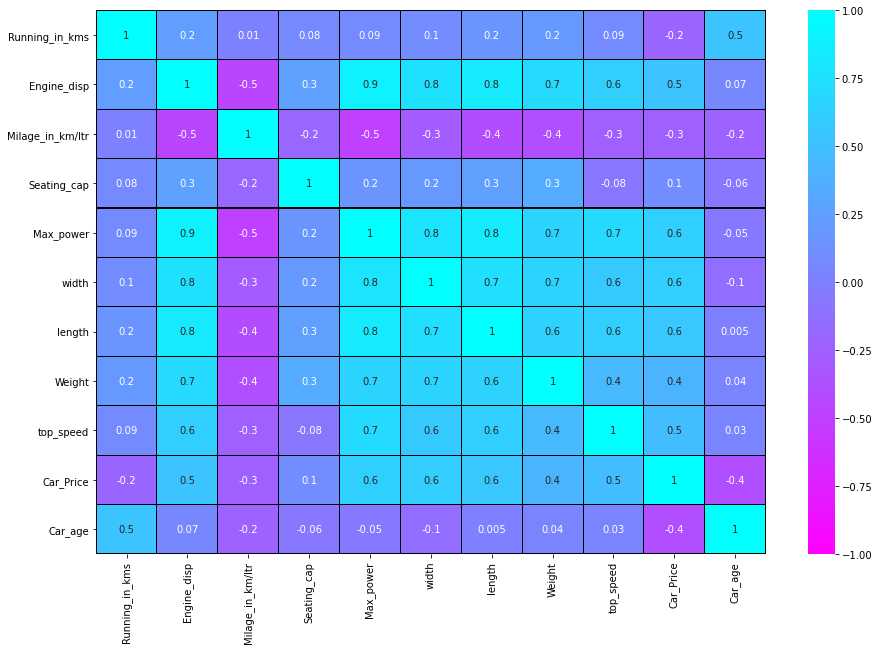

In [105]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(15,10))    
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,cmap="cool_r")
plt.yticks(rotation=0);

This heatmap shows the correlation matrix by visualizing the data. We can observe the relation between one feature to other.

This heat map contains both positive and negative correlation.

## Separating the features and label into x and y

In [106]:
x = new_df.drop("Car_Price", axis=1)
y = new_df["Car_Price"]

### Encoding categorical columns 

In [107]:
print("Categorical columns are: ",categorical_col)

Categorical columns are:  ['Model', 'Brand', 'Fuel_type', 'Gear_transmission', 'color', 'front_brake_type', 'rear_brake_type', 'Location']


Since all the categorical columns are nominal in nature, we can perform **OneHotEncoding**.

In [108]:
x.columns

Index(['Model', 'Brand', 'Fuel_type', 'Running_in_kms', 'Engine_disp',
       'Gear_transmission', 'Milage_in_km/ltr', 'Seating_cap', 'color',
       'Max_power', 'front_brake_type', 'rear_brake_type', 'width', 'length',
       'Weight', 'top_speed', 'Location', 'Car_age'],
      dtype='object')

In [109]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [110]:
cTransformer = ColumnTransformer([('encoder',OneHotEncoder(sparse = False, drop ='first'),[0,1,2,5,8,10,11,16])],remainder='passthrough')

In [111]:
x = np.array(cTransformer.fit_transform(x),dtype= np.float32)

In [112]:
x.dtype

dtype('float32')

In [113]:
x.shape

(11481, 442)

In [114]:
y.shape

(11481,)

### Feature Scaling using StandardScaler

In [115]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-1.8668775e-02, -7.7188842e-02, -3.6169264e-02, ...,
        -1.0793090e+00,  3.0349368e-02,  3.3646929e-01],
       [-1.8668775e-02, -7.7188842e-02, -3.6169264e-02, ...,
         2.7186407e-02, -2.1535888e-01,  3.5131225e-04],
       [-1.8668775e-02, -7.7188842e-02, -3.6169264e-02, ...,
         9.9180669e-01,  6.5375453e-01, -1.0080026e+00],
       ...,
       [-1.8668775e-02, -7.7188842e-02, -3.6169264e-02, ...,
         2.3483884e+00,  1.3983743e+00, -3.3576667e-01],
       [-1.8668775e-02, -7.7188842e-02, -3.6169264e-02, ...,
         2.7186407e-02, -2.1535888e-01, -6.7188466e-01],
       [-1.8668775e-02, -7.7188842e-02, -3.6169264e-02, ...,
         1.6153514e+00,  2.6094005e+00,  1.3448232e+00]], dtype=float32)

In [116]:
from sklearn.decomposition import PCA
pca = PCA(n_components=25)

In [117]:
pca.fit(x)

PCA(n_components=25)

In [118]:
x_pca = pca.transform(x)

In [119]:
x.shape

(11481, 442)

In [120]:
x_pca.shape

(11481, 25)

So I have successfully completed the data preprocessing steps, now lets build the model.

## Building machine learning models

### Finding the best random state

In [121]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x_pca,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9262066295653444  on Random_state  114


### Creating new train test split

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=.30,random_state=maxRS)

### Decision Tree Regressor

R2_Score: 83.63443364433778
Mean Absolute Error: 93957.70691823898
Mean Squared Error: 42713353828.37178
Root Mean Squared Error: 206672.09252429748

Cross Validation Score: 75.4616575877371

R2 Score - Cross Validation Score is 8.172776056600682


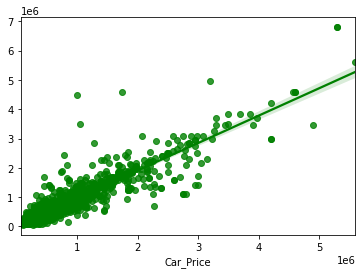

In [124]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
predDTR=DTR.predict(x_test)

R2_score = r2_score(y_test,predDTR)*100    
print('R2_Score:',R2_score)     # R squared score

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predDTR))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predDTR))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

# Cross Validation Score
cv_score = (cross_val_score(DTR, x_pca, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score and cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicted values
sns.regplot(y_test,predDTR,color="g")
plt.show()

* Created Decision Tree Regressor model and checked for its evaluation metrics. The model is giving R2 score as 83.63%.
* From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and dots are the predictions that the model has given.

### Random Forest Regressor

R2_score: 93.07571183239803
Mean absolute error: 72799.2500547377
Mean Squared error: 18072064484.958294
Root mean squared error 134432.37885627963

Cross Validation score: 86.8239239700291

R2 Score - Cross Validation Score is 6.2517878623689285


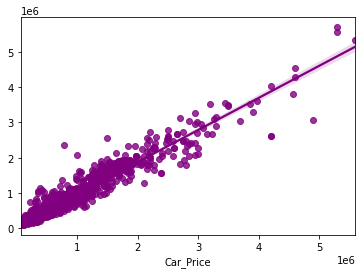

In [128]:
# Checking R2 score for Random Forest Regressor
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
predRFR = RFR.predict(x_test)

R2_score = r2_score(y_test,predRFR)*100
print("R2_score:",R2_score)

print("Mean absolute error:",metrics.mean_absolute_error(y_test,predRFR))
print("Mean Squared error:",metrics.mean_squared_error(y_test,predRFR))
print("Root mean squared error",np.sqrt(metrics.mean_squared_error(y_test,predRFR)))

# Cross Validation Score
cv_score = (cross_val_score(RFR, x_pca, y, cv=5).mean())*100
print("\nCross Validation score:",cv_score)

# Difference between R2 score nad cv_score
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicted values
sns.regplot(y_test,predRFR,color="purple")
plt.show()

* Created Random Forest Regressor model and checked for it's evaluation metrics. The model is giving R2 score as 93.07%.
* From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and dots are the predictions that our model has given.

### Extra Tree Regressor

R2_Score: 93.87917558358238
Mean Absolute Error: 62629.75648089018
Mean Squared Error: 15975062111.390305
Root Mean Squared Error: 126392.49230626914

Cross Validation Score: 89.01898896970101

R2 Score - Cross Validation Score is 4.860186613881368


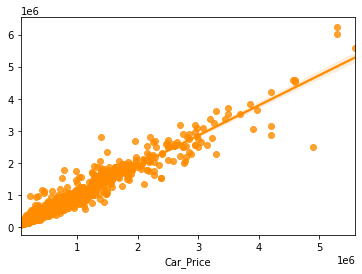

In [129]:
# Checking R2 score for Extra Trees Regressor
XT=ExtraTreesRegressor()
XT.fit(x_train,y_train)
predXT=XT.predict(x_test)

R2_score = r2_score(y_test,predXT)*100      # R squared score
print('R2_Score:',R2_score) 

# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predXT))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predXT))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predXT))) 

# Cross Validation Score
cv_score = (cross_val_score(XT, x_pca, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predXT,color="darkorange")
plt.show()

Created ExtraTreesRegresso model and checked for it's evaluation metrics. The model is giving R2 score as 93.87%.
From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and dots are the predictions that our model has given.

### Gradient Boosting Regressor

R2 score : 86.99123332834591
Mean absoulte error: 113380.83874839134
Mean squared error: 33952265484.832836
Root mean squared error: 184261.40530461835
Cross validation score : 81.60528115735659

R2_score - cv_score is  5.385952170989327


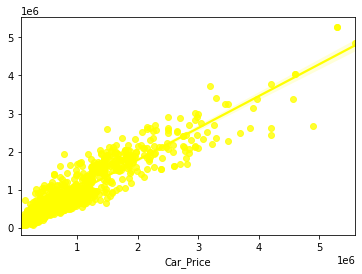

In [133]:
# Creating R2 score for GradientBoostingRegressor

GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)

R2_score = r2_score(y_test,predGB)*100
print("R2 score :",R2_score)

print("Mean absoulte error:",metrics.mean_absolute_error(y_test,predGB))
print("Mean squared error:",metrics.mean_squared_error(y_test,predGB))
print("Root mean squared error:",np.sqrt(metrics.mean_squared_error(y_test,predGB)))

# Cross Validation Score
cv_score = (cross_val_score(GB,x_pca,y,cv=5).mean())*100
print("Cross validation score :", cv_score)

# Differnce of R2_square and cv_score
Difference = R2_score - cv_score
print("\nR2_score - cv_score is ",Difference)

# Visualizing the predicted values
sns.regplot(y_test,predGB,color='yellow')
plt.show()

* Created GradientBoosting Regressor model and checked for its evaluation metrics. The model is giving R2 score as 86.99%.
* From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and the dots are the predictions that our model has given

### Extreme Gradient Boosting Regressor

R2_Score: 92.44671401003481
Mean Absolute Error: 78029.66522360305
Mean Squared Error: 19713719039.40515
Root Mean Squared Error: 140405.55202485816

Cross Validation Score: 86.89198017269348

R2 Score - Cross Validation Score is 5.554733837341331


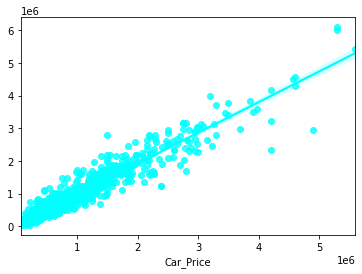

In [134]:
# Checking R2 score for XGB Regressor
from xgboost import XGBRegressor as xgb
XGB=xgb(verbosity=0)
XGB.fit(x_train,y_train)
predXGB=XGB.predict(x_test)

R2_score = r2_score(y_test,predXGB)*100      
print('R2_Score:',R2_score) 

# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predXGB))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predXGB))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predXGB))) 

# Cross Validation Score
cv_score = (cross_val_score(XGB, x_pca, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score and cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predXGB,color="cyan")
plt.show()

* Created XGB Regressor model and checked for its evaluation metrics. The model is giving R2 score as 92.44%.
* From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and the dots are the predictions that our model has given.

### Bagging Regressor

R2_Score: 91.1251712642191
Mean Absolute Error: 80347.32542815675
Mean Squared Error: 23162883075.320957
Root Mean Squared Error: 152193.57107092586

Cross Validation Score: 85.61348733175167

R2 Score - Cross Validation Score is 5.5116839324674345


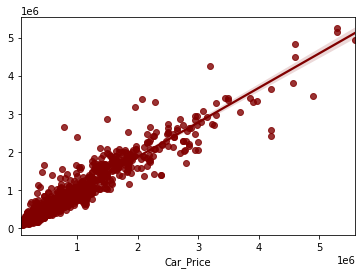

In [135]:
# Checking R2 score for BaggingRegressor
BR=BaggingRegressor()
BR.fit(x_train,y_train)
predBR=BR.predict(x_test)

R2_score = r2_score(y_test,predBR)*100      
print('R2_Score:',R2_score) 

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predBR))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predBR))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predBR))) 

# Cross Validation Score
cv_score = (cross_val_score(BR, x_pca, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score and cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predBR,color="maroon")
plt.show()

Created BaggingRegressor model and checked for its evaluation metrics. The model is giving R2 score as 91.12%.
From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and the dots are the predictions that our model has given.

### KNeighborsRegressor

R2_Score: 88.7943969495286
Mean Absolute Error: 83901.17335268504
Mean Squared Error: 29246093752.781666
Root Mean Squared Error: 171014.8933654074

Cross Validation Score: 85.20666311605002

R2 Score - Cross Validation Score is 3.5877338334785804


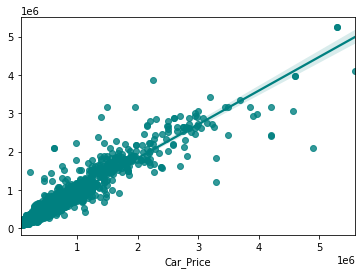

In [136]:
# Checking R2 score for KNeighborsRegressor

knn=KNN()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)

R2_score = r2_score(y_test,predknn)*100      # R squared score
print('R2_Score:',R2_score) 

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predknn))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predknn))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predknn))) 

# Cross Validation Score
cv_score = (cross_val_score(knn, x_pca, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score and cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predknn,color="teal")
plt.show()

* Created KNN Regressor model and checked for its evaluation metrics. The model is giving R2 score as 88.79%.
* From the graph we can observe how our model is mapping. In the graph we can observe the straight line which is our actual dataset and the dots are the predictions that our model has given.

### Model Selection

|Model||R2_Score||Cross_Validation_Score||Difference|
|-------||-------||-------||-------|
|DecisionTreeRegressor||83.63||75.46||8.17|
|RandomForestRegressor||93.07||86.82||6.25|
|ExtraTreesRegressor||93.87||89.01||4.86|
|GradientBoostingRegressor||86.99||81.60||5.38|
|XGBRegressor||92.44||86.89||5.55|
|BaggingRegressor||91.12||85.61||5.51|
|KNeighborsRegressor||88.79||85.20||3.58|

From the difference between R2 score and Cross Validation score, it can be seen that the KNeighborsRegressor has least difference and low evaluation metrics compared to other models. That is KNeighborsRegressor gave the best R2 score, MAE, MSE and RMSE values. So we can conclude that KNeighborsRegressor as our best fitting model. Let's try to increase our model score by tuning the best model using different types of hyper parameters.

### Hyper parameter tuning

In [141]:
# Let's Use the GridSearchCV to find the best parameters in KNNRegressor
from sklearn.model_selection import GridSearchCV

#KNN Regressor
parameters = {'leaf_size':np.arange(1,50),
            'n_neighbors':np.arange(1,30),
            'p':[1,2],
            'n_jobs':[-2,-1,1]
             }           

In [143]:
GCV = GridSearchCV(KNN(),parameters,cv=5)

In [144]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'n_jobs': [-2, -1, 1],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2]})

In [145]:
GCV.best_params_

{'leaf_size': 1, 'n_jobs': -2, 'n_neighbors': 2, 'p': 2}

R2 score: 91.16605801738214
RMSE value : 151842.58488375376
MAE: 73155.97968069666
MSE: 23056170584.17997


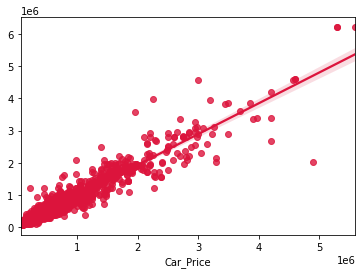

In [147]:
Car_price_model = KNN(leaf_size=1,n_neighbors=2,p=2,n_jobs=-2)

Car_price_model.fit(x_train,y_train)
pred = Car_price_model.predict(x_test)

print("R2 score:",r2_score(y_test,pred)*100)
print("RMSE value :",np.sqrt(metrics.mean_squared_error(y_test,pred)))
print("MAE:",metrics.mean_absolute_error(y_test,pred))
print("MSE:",metrics.mean_squared_error(y_test,pred))

# Visualizing the predicted values
sns.regplot(y_test,pred,color="crimson")
plt.show()

I have successfully incorporated the hyper parameter tuning using best parameters of KNN Regressor and the R2 score of the model has been increased after hyperparameter tuning and received the R2 score as 91.16% which is very good.
From the graph we can observe how our final model is mapping. In the graph we can observe the best fit line which is our actual dataset and the dots are the predictions that our best final model has given.

### Saving the final model

In [148]:
# Saving the model using joblib library 
import joblib
joblib.dump(Car_price_model,"Car_Price_Prediction.pkl")

['Car_Price_Prediction.pkl']

### Loading the saved model and predicting car price

In [149]:
# Loading the saved model
Model=joblib.load("Car_Price_Prediction.pkl")

#Prediction
prediction = Model.predict(x_test)
prediction

array([ 378000., 1650000.,  538500., ...,  544500.,  210000.,  392500.])

These are the predicted prices of the cars.

## Creating Dataframe for the predicted values

In [150]:
Predicted_car_price = pd.DataFrame([Model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
Predicted_car_price

0          1         2         3         4         5     \
Predicted  378000.0  1650000.0  538500.0  425000.0  505000.0  340000.0   
Original   379000.0  1650000.0  465000.0  435000.0  550000.0  450000.0   

               6         7          8         9          10        11    \
Predicted  497000.0  497000.0  1562500.0  643000.0   877500.0  394000.0   
Original   550000.0  550000.0  1500000.0  643000.0  1125000.0  385000.0   

               12        13        14        15        16         17    \
Predicted  333500.0  705000.0  287000.0  408000.0  385000.0  1796500.0   
Original   325000.0  705000.0  275000.0  485000.0  265000.0  1630000.0   

               18        19        20        21        22        23    \
Predicted  612500.0  523500.0  559500.0  400000.0  606500.0  394500.0   
Original   550000.0  549000.0  640000.0  365000.0  553000.0  424000.0   

               24        25        26        27        28        29    \
Predicted  440000.0  518000.0  527500.0  265000.0  220000.0  613000.0   
Original   410000.0  543000.0  399000.0  325000.0  161000.0  613000.0   

               30        31        32        33        34        35    \
Predicted  891000.0  299000.0  497000.0  345000.0  450000.0  275000.0   
Original   940000.0  299000.0  550000.0  345000.0  640000.0  250000.0   

               36        37        38        39        40        41    \
Predicted  400500.0  785000.0  260500.0  392000.0  850000.0  250000.0   
Original   429000.0  915000.0  230000.0  392000.0  864000.0  335000.0   

               42         43         44        45        46        47    \
Predicted  536000.0  1375500.0  3947500.0  520000.0  255000.0  398000.0   
Original   536000.0  1251000.0  3200000.0  440000.0  255000.0  460000.0   

               48        49        50        51        52        53    \
Predicted  636500.0  680000.0  487500.0  304000.0  283000.0  669500.0   
Original   500000.0  875000.0  536000.0  317000.0  283000.0  565000.0   

               54        55        56        57        58        59    \
Predicted  319500.0  438000.0  426000.0  332500.0  370000.0  321000.0   
Original   399000.0  472000.0  426000.0  295000.0  370000.0  363000.0   

               60        61        62        63        64        65    \
Predicted  675000.0  219000.0  962500.0  750000.0  638000.0  617500.0   
Original   825000.0  240000.0  950000.0  805000.0  576000.0  590000.0   

               66        67        68         69        70        71    \
Predicted  668000.0  475000.0  536500.0  1450000.0  480000.0  357500.0   
Original   708000.0  460000.0  446000.0  1375000.0  410000.0  553000.0   

               72        73        74        75        76        77    \
Predicted  486000.0  509500.0  649000.0  810000.0  622500.0  887500.0   
Original   486000.0  480000.0  734000.0  875000.0  565000.0  900000.0   

               78        79        80        81        82         83    \
Predicted  237500.0  447500.0  665500.0  258000.0  850000.0  1100000.0   
Original   190000.0  375000.0  670000.0  250000.0  776000.0  1075000.0   

               84        85        86        87        88         89    \
Predicted  344000.0  196500.0  410500.0  625000.0  250000.0  1312500.0   
Original   300000.0  234000.0  450000.0  735000.0  249000.0  1050000.0   

               90        91        92        93        94        95    \
Predicted  451500.0  790000.0  497000.0  293500.0  465500.0  412500.0   
Original   338000.0  885000.0  538000.0  306000.0  514000.0  445000.0   

               96         97        98        99        100       101   \
Predicted  564000.0   816500.0  945000.0  528000.0  232500.0  522500.0   
Original   564000.0  1150000.0  490000.0  528000.0  345000.0  675000.0   

               102       103        104       105       106        107   \
Predicted  602000.0  232500.0  1220000.0  262000.0  362500.0  4575000.0   
Original   615000.0  165000.0  2265000.0  299000.0  360000.0  3000000.0   

               108 

Using regression model, we have got the predicted price of the cars. From the above output we can observe that predicted values are almost near to the actual values.

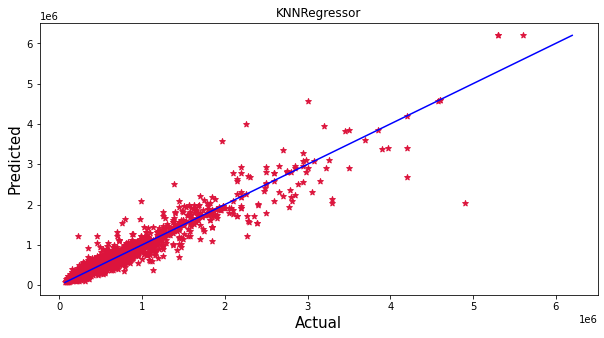

In [151]:
# Visualizing actual and predicted values
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson',marker="*")
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("KNNRegressor")
plt.show()

The graph shows how our final model is mapping. The plot gives the linear relation between predicted and actual price of the used cars. The blue line is the best fitting line which gives the actual values/data and red dots gives the predicted values/data.

In [152]:
# Saving the predicted car price values in csv file
Predicted_car_price.to_csv("Predicted_car_price.csv",index=False)

## Conclusion

From the difference between R2 score and Cross Validation score, it can be seen that the KNeighborsRegressor has least difference and low evaluation metrics compared to other models. That is KNeighborsRegressor gave the best R2 score, MAE, MSE and RMSE values. So we can conclude that KNeighborsRegressor as our best fitting model. Let's try to increase our model score by tuning the best model using different types of hyper parameters.